<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yaml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yaml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [75]:

import os
HOME = os.getcwd()
print(HOME)

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


In [76]:
#%pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Setup complete  (16 CPUs, 15.7 GB RAM, 507.6/936.5 GB disk)


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [77]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt conf=0.25 source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\zidane.jpg: 384x640 2 persons, 1 tie, 90.9ms
Speed: 3.5ms preprocess, 90.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict5
 Learn more at https://docs.ultralytics.com/modes/predict


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

In [78]:

from ultralytics import YOLO

from IPython.display import display, Image

In [79]:
#model = YOLO(f'yolov8n.pt')
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://ultralytics.com/images/zidane.jpg', conf=0.25)


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\zidane.jpg: 384x640 2 persons, 1 tie, 88.2ms
Speed: 2.0ms preprocess, 88.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
results[0].boxes.xyxy

tensor([[ 123.4519,  197.1840, 1110.5618,  710.5098],
        [ 746.5687,   40.8013, 1142.0804,  712.3660],
        [ 436.7941,  437.1295,  523.5345,  713.7365]])

In [8]:
results[0].boxes.conf

tensor([0.8056, 0.7937, 0.3702])

In [9]:
results[0].boxes.cls

tensor([ 0.,  0., 27.])

In [12]:
!mkdir {HOME}\datasets
%cd {HOME}\datasets

#!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
# project = rf.workspace("roboflow-jvuqo").project("vegetation-gynk8")
# dataset = project.version(1).download("yolov8")


# project = rf.workspace("vegetation-ojnpy").project("vegetation-yolo8")
# version = project.version(1)
# dataset = version.download("yolov8-obb")


from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
project = rf.workspace("vegetation-ojnpy").project("vegetation-yolo8")
version = project.version(2)
dataset = version.download("yolov8")


A subdirectory or file c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets already exists.


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegetation-yolo8-2 in yolov8:: 100%|█████████████| 158/158 [00:00<00:00, 1766.23it/s]


In [20]:
# !pip install roboflow

# from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
project = rf.workspace("alpaco5-f3woi").project("part-autolabeld")
version = project.version(5)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to part-autolabeld-5 in yolov8-obb:: 100%|██████| 18890/18890 [00:09<00:00, 2063.52it/s]


In [21]:
# !pip install roboflow

# from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
project = rf.workspace("vegetation-ojnpy").project("vegetation-yolo8")
version = project.version(3)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegetation-yolo8-3 in yolov8-obb:: 100%|█████████| 158/158 [00:00<00:00, 2050.97it/s]


In [220]:
%cd {HOME}

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


In [221]:
# !pip install roboflow

# from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
project = rf.workspace("vegetation-ojnpy").project("vegetation-yolo8")
version = project.version(4)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegetation-yolo8-4 in yolov8-obb:: 100%|███████| 4068/4068 [00:01<00:00, 2144.79it/s]


In [222]:
# !pip install roboflow

# from roboflow import Roboflow
rf = Roboflow(api_key="03mtjo8gQV6FWUxCtzZ7")
project = rf.workspace("vegetation-ojnpy").project("vegetation-yolo8")
version = project.version(5)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegetation-yolo8-5 in yolov8-obb:: 100%|███████| 1026/1026 [00:00<00:00, 2220.17it/s]


In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={HOME}/datasets/vegetation-yolo8-2/data.yaml epochs=25 imgsz=288 plots=True

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


New https://pypi.org/project/ultralytics/8.2.16 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples/datasets/vegetation-yolo8-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=288, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [18]:


%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={HOME}/datasets/vegetation-yolo8-2/data.yaml

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-2\valid\labels.cache... 15 images, 2 backgrounds, 0 corrupt: 100%|##########| 15/15 [00:00<?, ?it/s]
val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-2\valid\labels.cache... 15 images, 2 backgrounds, 0 corrupt: 100%|##########| 15/15 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:00<00:00,  2.98it/

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={HOME}/datasets/vegetation-yolo8-2/test/images save=True

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/7 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-2\test\images\satellite_39-948932_-75-152446_IonicStreet_30_png.rf.f09c3526be654cbf10242043ff0263f7.jpg: 288x288 1 vegetation, 55.9ms
image 2/7 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-2\test\images\satellite_39-94931349740212_-75-14567243066136_ElbowLane_90_png.rf.2f1bc294e304abb09c05aa349f7fb1be.jpg: 288x288 2 vegetations, 34.9ms
image 3/7 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-2\test\images\satellite_39-949908111274105_-75-14189902030094_MarketStreet_21_png.rf.ac42ccc995b932fbb0410fb1d58435ae.jpg: 288x288 1 vegetation, 31.6ms
image 4/7 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\

## Yolov8 using segmentation

In [22]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples



  0%|          | 0.00/22.8M [00:00<?, ?B/s]
 11%|#         | 2.50M/22.8M [00:00<00:00, 25.8MB/s]
 31%|###       | 7.00M/22.8M [00:00<00:00, 37.8MB/s]
 54%|#####3    | 12.2M/22.8M [00:00<00:00, 45.5MB/s]
 76%|#######6  | 17.4M/22.8M [00:00<00:00, 48.7MB/s]
 97%|#########7| 22.1M/22.8M [00:00<00:00, 48.7MB/s]
100%|##########| 22.8M/22.8M [00:00<00:00, 46.1MB/s]
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs


  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|##########| 104k/104k [00:00<00:00, 2.80MB/s]
image 1/1 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 210.7ms
Speed: 3.7ms preprocess, 210.7ms inference, 14.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\segment\predict
 Learn more at https://docs.ultralytics.com/modes/predict


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples/runs/segment/predict/dog.jpeg


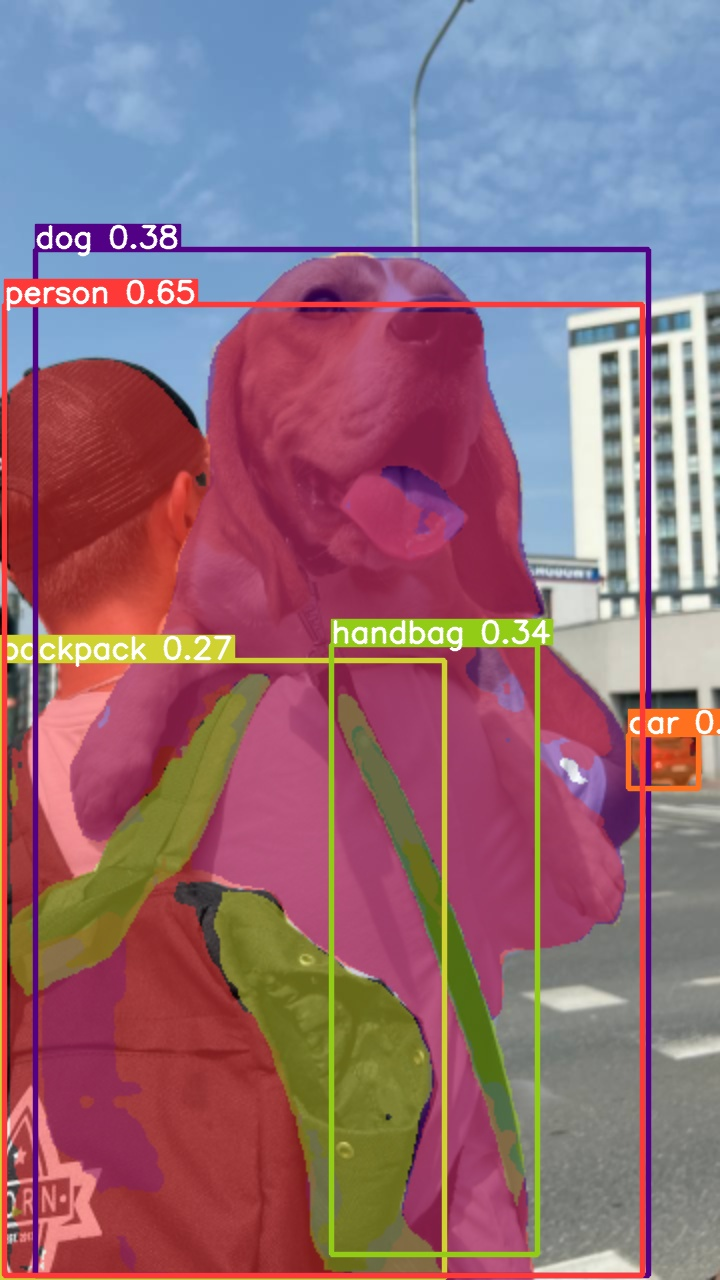

In [33]:
%cd {HOME}
filename='{}/runs/segment/predict/dog.jpeg'.format(HOME)
print(filename)
Image(filename, height=600)

In [34]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 219.9ms
Speed: 11.0ms preprocess, 219.9ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 384)


In [35]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]])

In [36]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  2., 16., 26., 24.])
conf: tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668])
data: tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03, 6.4894e-01, 0.0000e+00],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02, 5.2386e-01, 2.0000e+00],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03, 3.7839e-01, 1.6000e+01],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03, 3.4418e-01, 2.6000e+01],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03, 2.6679e-01, 2.4000e+01]])
id: None
is_track: False
orig_shape: (1280, 720)
shape: torch.Size([5, 6])
xywh: tensor([[ 323.5287,  789.9412,  638.1681,  971.2043],
        [ 663.2643,  761.4158,   69.8544,   53.8037],
        [ 342.1039,  762.9004,  613.4695, 1025.9641],
        [ 434.7195,  949.3884,  206.4392,  610.1503],
        [ 222.5279,  969.4620,  443.2772,  618.0269]])
xywhn: tensor([[0.4493, 0.6171, 0.8863, 0.7588],
        [0.9212, 0.5949, 0.097

In [39]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

## Yolo v8 segmentation training

In [223]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={HOME}/datasets/vegetation-yolo8-5/data.yaml epochs=1000 imgsz=288

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


New https://pypi.org/project/ultralytics/8.2.19 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples/datasets/vegetation-yolo8-5/data.yaml, epochs=1000, patience=50, batch=16, imgsz=288, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

# Inference with custom model

In [225]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train10/weights/best.pt conf=0.25 source={HOME}/datasets/vegetation-yolo8-5/test/images save=true

c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples


Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/21 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\images\satellite_39-9461786486179_-75-14919528524133_LocustStreet_166_png.rf.cda6382e169b0cd843a1d83b0b105b44.jpg: 288x288 9 vegetations, 97.9ms
image 2/21 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\images\satellite_39-94652135837431_-75-14801523931955_WillingsAlley_132_png.rf.db32a50954999c7a7cee3183fa2b98fb.jpg: 288x288 4 vegetations, 60.8ms
image 3/21 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\images\satellite_39-9484991461875_-75-14467144875356_SouthStrawberryStreet_207_png.rf.547b6790bb03a7859f01f836c586937b.jpg: 288x288 3 vegetations, 67.1ms
image 4/21 c:\Users\Hashim

In [226]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train10/weights/best.pt conf=0.25 source={HOME}/datasets/satellite_images save=true

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/928 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\satellite_images\satellite_39.94549015542814_-75.14174565070432_SouthChristopherColumbusBoulevard_662.png: 288x288 4 vegetations, 92.4ms
image 2/928 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\satellite_images\satellite_39.94549984236255_-75.14234582907196_DelawareExpressway_333.png: 288x288 (no detections), 59.1ms
image 3/928 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\satellite_images\satellite_39.945528059360605_-75.14197797734637_SouthChristopherColumbusBoulevard_863.png: 288x288 5 vegetations, 59.6ms
image 4/928 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\satellite_images\satellite_39.945551560035526_-75.145

In [117]:
from ultralytics import YOLO
print(HOME)
# Load a model
# model='c:/Users/Hashim/DIS-9901A/DigitalTwinData/code/ultralytics/examples/runs/segment/train9/weights/best.pt'
# model = YOLO(model)  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(['c:/Users/Hashim/DIS-9901A/DigitalTwinData/code/ultralytics/examples//datasets/vegetation-yolo8-3/test/images/satellite_39-948932_-75-152446_IonicStreet_30_png.rf.f09c3526be654cbf10242043ff0263f7.jpg', 'c:/Users/Hashim/DIS-9901A/DigitalTwinData/code/ultralytics/examples/datasets/vegetation-yolo8-3/test/images/satellite_39-94931349740212_-75-14567243066136_ElbowLane_90_png.rf.2f1bc294e304abb09c05aa349f7fb1be.jpg'])  # return a list of Results objects

results
# Process results list
# for result in results:
#     boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Probs object for classification outputs
#     obb = result.obb  # Oriented boxes object for OBB outputs
#     result.show()  # display to screen
#     result.save(filename='result.jpg')  # save to disk

for result in results:
    print(result.masks.xy)
    print("+"*80)


0: 288x288 2 vegetations, 1: 288x288 6 vegetations, 109.5ms
Speed: 1.0ms preprocess, 54.7ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples
[array([[        129,         216],
       [        128,         217],
       [        127,         217],
       [        125,         219],
       [        125,         220],
       [        124,         221],
       [        124,         275],
       [        125,         276],
       [        125,         278],
       [        126,         279],
       [        126,         281],
       [        127,         282],
       [        127,         283],
       [        128,         284],
       [        128,         287],
       [        162,         287],
       [        162,         284],
       [        163,         283],
       [        163,         268],
       [        162,         267],
       [        162,         259],
       [        161,         258],
       [        161,         252],
       [        162,         251],
       [        162,         245],
       [        163,         244],
       [        163, 

In [133]:
results[1].boxes.data[:, 5]

tensor([0., 0., 0., 0., 0., 0.])

In [134]:
i=0
print(model.predictor.save_dir)
for result in results:
    # get array results
    masks = result.masks.data
    boxes = result.boxes.data
    # extract classes
    clss = boxes[:, 5]
    print(clss)
    # get indices of results where class is 0 (vegetation in COCO)
    vegetation_indices = torch.where(clss == 0)
    # use these indices to extract the relevant masks
    vegetation_masks = masks[vegetation_indices]
    # scale for visualizing results
    vegetation_masks = torch.any(vegetation_masks, dim=0).int() * 255
    # save to file
    cv2.imwrite(str(HOME / model.predictor.save_dir / 'merged_segs_{}.jpg'.format(i)), vegetation_masks.cpu().numpy())
    print("loop {} done".format(i))
    i = i +1
    # if i ==1:
    #     break

runs\segment\predict7
tensor([0., 0.])
loop 0 done
tensor([0., 0., 0., 0., 0., 0.])
loop 1 done


In [197]:
#glob.glob(os.path.join(HOME,model.predictor.save_dir,"sa*.jpg"))
#print(os.path.join(HOME,"datasets\\vegetation-yolo8-3\\test\\images","*.jpg"))
glob.glob(os.path.join(HOME,"datasets\\vegetation-yolo8-3\\test\\images","*.jpg"))[:]
# for image_path in os.path.join(HOME,"datasets\\vegetation-yolo8-3\\test\\images","sa*.jpg")[:]:
#     print(image_path)

['c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegetation-yolo8-3\\test\\images\\satellite_39-948932_-75-152446_IonicStreet_30_png.rf.f09c3526be654cbf10242043ff0263f7.jpg',
 'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegetation-yolo8-3\\test\\images\\satellite_39-94931349740212_-75-14567243066136_ElbowLane_90_png.rf.2f1bc294e304abb09c05aa349f7fb1be.jpg',
 'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegetation-yolo8-3\\test\\images\\satellite_39-949908111274105_-75-14189902030094_MarketStreet_21_png.rf.ac42ccc995b932fbb0410fb1d58435ae.jpg',
 'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegetation-yolo8-3\\test\\images\\satellite_39-95003459983976_-75-14733556919555_South4thStreet_6_png.rf.d202b88c04b2cfb7280b1ac9b9544d89.jpg',
 'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegeta

In [231]:
# Inference images output location

inference_loc = os.path.join(HOME,"datasets\\vegetation-yolo8-5\\test\\satellite_images_bin")
!mkdir {inference_loc}

i = 0

#for image_path in glob.glob(os.path.join(HOME,"datasets\\vegetation-yolo8-3\\test\\images","*.jpg"))[:]:
for image_path in glob.glob(os.path.join(HOME,"datasets\\vegetation-yolo8-5\\test\\satellite_images","*.png"))[:]:
    print(image_path)
    # Run batched inference on a list of images
    results = model([image_path])  # return a list of Results objects
    for result in results:
        # get array results
        if (result.masks != None):
            
            masks = result.masks.data
            boxes = result.boxes.data
            # extract classes
            clss = boxes[:, 5]
            print(clss)
            # get indices of results where class is 0 (vegetation in COCO)
            vegetation_indices = torch.where(clss == 0)
            # use these indices to extract the relevant masks
            vegetation_masks = masks[vegetation_indices]
            # scale for visualizing results
            vegetation_masks = torch.any(vegetation_masks, dim=0).int() * 255
            # save to file
            #cv2.imwrite(os.path.join(HOME,model.predictor.save_dir,basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1]), vegetation_masks.cpu().numpy())
            basename_without_ext = os.path.splitext(os.path.basename(image_path))[0]
            # print(os.path.join(os.path.split(image_path)[0],basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1]))
            # cv2.imwrite(os.path.join(os.path.split(image_path)[0],basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1]), vegetation_masks.cpu().numpy())
    
            print(os.path.join(inference_loc,basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1]))
            cv2.imwrite(os.path.join(inference_loc,basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1]), vegetation_masks.cpu().numpy())
            
            print("loop {} done".format(i))
            i = i +1

A subdirectory or file c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin already exists.

0: 288x288 7 vegetations, 74.8ms
Speed: 2.0ms preprocess, 74.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94549015542814_-75.14174565070432_SouthChristopherColumbusBoulevard_662.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94549015542814_-75.14174565070432_SouthChristopherColumbusBoulevard_662_bin.png
loop 0 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94549984236255_-75.14234582907196_DelawareExpressway_333.png


0: 288x288 (no detections), 89.4ms
Speed: 0.0ms preprocess, 89.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 82.9ms
Speed: 1.0ms preprocess, 82.9ms inference, 6.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 82.0ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.945528059360605_-75.14197797734637_SouthChristopherColumbusBoulevard_863.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.945528059360605_-75.14197797734637_SouthChristopherColumbusBoulevard_863_bin.png
loop 1 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.945551560035526_-75.14555012748514_PhilipPlace_187.png


Speed: 0.0ms preprocess, 82.0ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 82.2ms
Speed: 0.0ms preprocess, 82.2ms inference, 4.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 73.1ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.945551560035526_-75.14555012748514_PhilipPlace_187_bin.png
loop 2 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94557002718017_-75.14669430584449_South3rdStreet_514.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94557002718017_-75.14669430584449_South3rdStreet_514_bin.png
loop 3 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94557091747265_-75.14381891331081_DockStreet_159.png


Speed: 1.0ms preprocess, 73.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 72.5ms
Speed: 0.0ms preprocess, 72.5ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94557091747265_-75.14381891331081_DockStreet_159_bin.png
loop 4 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94562236442627_-75.14993699146757_South5thStreet_646.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94562236442627_-75.14993699146757_South5thStreet_646_bin.png
loop 5 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94564510406425_-75.15134588289038_ManningWalk_289.png


0: 288x288 9 vegetations, 185.3ms
Speed: 1.0ms preprocess, 185.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 79.5ms
Speed: 1.0ms preprocess, 79.5ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 71.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94564510406425_-75.15134588289038_ManningWalk_289_bin.png
loop 6 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94564675003432_-75.147526974207_SaintJosephsWay_317.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94564675003432_-75.147526974207_SaintJosephsWay_317_bin.png
loop 7 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94567440783605_-75.15316147172202_South7thStreet_530.png


Speed: 1.0ms preprocess, 71.8ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 83.6ms
Speed: 0.0ms preprocess, 83.6ms inference, 7.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 85.2ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94567440783605_-75.15316147172202_South7thStreet_530_bin.png
loop 8 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.945694257036685_-75.15439127883536_SpruceStreet_538.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.945694257036685_-75.15439127883536_SpruceStreet_538_bin.png
loop 9 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94571235224992_-75.14256077251781_DelawareExpressway_348.png


Speed: 1.0ms preprocess, 85.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 91.6ms
Speed: 0.0ms preprocess, 91.6ms inference, 8.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 26 vegetations, 78.5ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94573106417934_-75.15468901233069_SpruceStreet_539.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94573106417934_-75.15468901233069_SpruceStreet_539_bin.png
loop 10 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94576139657827_-75.14299647403024_SouthFrontStreet_422.png


Speed: 0.0ms preprocess, 78.5ms inference, 11.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 76.7ms
Speed: 0.0ms preprocess, 76.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 70.6ms
Speed: 1.0ms preprocess, 70.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94576139657827_-75.14299647403024_SouthFrontStreet_422_bin.png
loop 11 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94576799689195_-75.15498665407215_SpruceStreet_540.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94576799689195_-75.15498665407215_SpruceStreet_540_bin.png
loop 12 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.945784872808325_-75.14168960742633_SouthChristopherColumbusBoulevard_663.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hash

0: 288x288 3 vegetations, 78.9ms
Speed: 1.4ms preprocess, 78.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 72.6ms
Speed: 0.0ms preprocess, 72.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 74.6ms
Speed: 1.0ms preprocess, 74.6ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.945793493621885_-75.14228443739587_DelawareExpressway_334_bin.png
loop 14 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94579412895042_-75.15475719000352_South8thStreet_537.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94579412895042_-75.15475719000352_South8thStreet_537_bin.png
loop 15 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.945806230053456_-75.1552842078074_SpruceStreet_541.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test

0: 288x288 21 vegetations, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 5.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 68.3ms
Speed: 0.0ms preprocess, 68.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 82.8ms
Speed: 0.0ms preprocess, 82.8ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9458232_-75.1419242_SouthChristopherColumbusBoulevard_862_bin.png
loop 17 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94583437379718_-75.14832523825208_SaintJamesWalk_795.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94583437379718_-75.14832523825208_SaintJamesWalk_795_bin.png
loop 18 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94583750725828_-75.15150371367987_South6thStreet_858.png
tensor([0., 0., 0., 0.])
c:\Users\Hashi

0: 288x288 19 vegetations, 76.2ms
Speed: 1.0ms preprocess, 76.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 73.6ms
Speed: 0.0ms preprocess, 73.6ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 70.7ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94584483256245_-75.14548695134282_PhilipPlace_188_bin.png
loop 20 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94584750859439_-75.14191903362826_SouthChristopherColumbusBoulevard_861.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94584750859439_-75.14191903362826_SouthChristopherColumbusBoulevard_861_bin.png
loop 21 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9458542109052_-75.14389442575117_DockStreet_158.png


Speed: 1.0ms preprocess, 70.7ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 66.4ms
Speed: 0.0ms preprocess, 66.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 68.8ms
Speed: 1.0ms preprocess, 68.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9458542109052_-75.14389442575117_DockStreet_158_bin.png
loop 22 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94586299124746_-75.14662971439557_South3rdStreet_515.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94586299124746_-75.14662971439557_South3rdStreet_515_bin.png
loop 23 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94587948595032_-75.1482453613709_South4thStreet_499.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datas

0: 288x288 20 vegetations, 66.2ms
Speed: 0.0ms preprocess, 66.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 32 vegetations, 70.0ms
Speed: 0.0ms preprocess, 70.0ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 32 vegetations, 70.9ms
Speed: 0.0ms preprocess, 70.9ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94591379744966_-75.14986591250572_South5thStreet_647_bin.png
loop 25 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9459252_-75.1454085_PhilipPlace_321.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9459252_-75.1454085_PhilipPlace_321_bin.png
loop 26 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9459252_-75.1454085_SaintJamesPlace_70.png
tensor([0., 0., 0., 0., 0., 

0: 288x288 15 vegetations, 73.3ms
Speed: 0.0ms preprocess, 73.3ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 70.2ms
Speed: 1.0ms preprocess, 70.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 71.3ms
Speed: 0.0ms preprocess, 71.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9459403_-75.1474651_SaintJamesPlace_77_bin.png
loop 28 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9459403_-75.1474651_SaintJosephsWay_316.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9459403_-75.1474651_SaintJosephsWay_316_bin.png
loop 29 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9459664252125_-75.15309272689062_South7thStreet_531.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\e

0: 288x288 35 vegetations, 77.1ms
Speed: 0.0ms preprocess, 77.1ms inference, 7.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 69.2ms
Speed: 1.0ms preprocess, 69.2ms inference, 4.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 72.4ms
Speed: 0.0ms preprocess, 72.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94597004891188_-75.14570512865718_SaintJamesPlace_71_bin.png
loop 31 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94598173276196_-75.147762225102_SaintJamesPlace_78.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94598173276196_-75.147762225102_SaintJamesPlace_78_bin.png
loop 32 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94598770295744_-7

0: 288x288 21 vegetations, 72.7ms
Speed: 0.0ms preprocess, 72.7ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 71.7ms
Speed: 0.0ms preprocess, 71.7ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 70.8ms
Speed: 0.0ms preprocess, 70.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9459933413862_-75.146002109088_SaintJamesPlace_72_bin.png
loop 34 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946005821799936_-75.14249851801425_DelawareExpressway_347.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94600712010425_-75.15318165290907_ManningStreet_47.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94600712010425_-75.15318165290907_ManningStreet_47_bin.png
loop 35 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\da

0: 288x288 17 vegetations, 74.1ms
Speed: 1.0ms preprocess, 74.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 72.5ms
Speed: 0.0ms preprocess, 72.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 72.8ms
Speed: 0.7ms preprocess, 72.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94602631296485_-75.14805888930529_SaintJamesPlace_79_bin.png
loop 36 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946030331619646_-75.1462998198914_SaintJamesPlace_73.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946030331619646_-75.1462998198914_SaintJamesPlace_73_bin.png
loop 37 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94603102046928_-75.14840479078968_SaintJamesWalk_794.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

0: 288x288 19 vegetations, 75.5ms
Speed: 1.0ms preprocess, 75.5ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 65.6ms
Speed: 1.5ms preprocess, 65.6ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 26 vegetations, 66.8ms
Speed: 1.3ms preprocess, 66.8ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9460447154494_-75.15347928790254_ManningStreet_46_bin.png
loop 39 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94605473867524_-75.14293362171014_SouthFrontStreet_421.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94605473867524_-75.14293362171014_SouthFrontStreet_421_bin.png
loop 40 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94606169030576_-75.14830291718663_LocustStreet_169.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

0: 288x288 15 vegetations, 76.0ms
Speed: 1.0ms preprocess, 76.0ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 69.7ms
Speed: 0.0ms preprocess, 69.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 66.8ms
Speed: 0.0ms preprocess, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94606846023464_-75.14870244539485_SaintJamesWalk_793_bin.png
loop 42 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94608230505374_-75.15377692362226_ManningStreet_45.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94608230505374_-75.15377692362226_ManningStreet_45_bin.png
loop 43 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94608714488122_-75.1422230457198_DelawareExpressway_335.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\veg

0: 288x288 9 vegetations, 72.6ms
Speed: 0.0ms preprocess, 72.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 74.1ms
Speed: 0.0ms preprocess, 74.1ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 72.7ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946087264567055_-75.15469338535635_South8thStreet_536_bin.png
loop 45 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94610066356928_-75.14860037488906_LocustStreet_168.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94610066356928_-75.14860037488906_LocustStreet_168_bin.png
loop 46 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946103538976764_-75.14780298660482_BinghamCourt_13.png


Speed: 0.0ms preprocess, 72.7ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 72.6ms
Speed: 1.0ms preprocess, 72.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 25 vegetations, 73.3ms
Speed: 0.5ms preprocess, 73.3ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946103538976764_-75.14780298660482_BinghamCourt_13_bin.png
loop 47 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946104_-75.151443_SouthWashingtonSquare_60.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946104_-75.151443_SouthWashingtonSquare_60_bin.png
loop 48 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9461059_-75.14900009999998_SaintJamesWalk_792.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

0: 288x288 11 vegetations, 71.3ms
Speed: 1.0ms preprocess, 71.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 68.4ms
Speed: 1.0ms preprocess, 68.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 66.0ms
Speed: 1.0ms preprocess, 66.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94611031292754_-75.14405066836429_DockStreet_157_bin.png
loop 50 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946119894658096_-75.15407455934195_ManningStreet_44.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946119894658096_-75.15407455934195_ManningStreet_44_bin.png
loop 51 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9461300951072_-75.15143745036181_South6thStreet_857.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\veget

0: 288x288 8 vegetations, 73.0ms
Speed: 0.0ms preprocess, 73.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 72.4ms
Speed: 0.0ms preprocess, 72.4ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9461388_-75.1542242_SouthPerthStreet_601_bin.png
loop 53 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94613966639289_-75.14889782871539_LocustStreet_167.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94613966639289_-75.14889782871539_LocustStreet_167_bin.png
loop 54 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94614095429719_-75.1418566668141_SouthChristopherColumbusBoulevard_860.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

0: 288x288 20 vegetations, 76.8ms
Speed: 0.0ms preprocess, 76.8ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 34 vegetations, 68.6ms
Speed: 0.0ms preprocess, 68.6ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 68.1ms
Speed: 0.0ms preprocess, 68.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94614168297731_-75.15174061887656_SouthWashingtonSquare_61_bin.png
loop 56 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946155957193774_-75.14656513147115_South3rdStreet_516.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946155957193774_-75.14656513147115_South3rdStreet_516_bin.png
loop 57 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946157829397904_-75.1

0: 288x288 28 vegetations, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 70.9ms
Speed: 0.0ms preprocess, 70.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 30 vegetations, 67.4ms
Speed: 0.0ms preprocess, 67.4ms inference, 6.8ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946172520290766_-75.14818109967426_South4thStreet_498_bin.png
loop 59 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94617825010892_-75.15203838194482_SouthWashingtonSquare_62.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94617825010892_-75.15203838194482_SouthWashingtonSquare_62_bin.png
loop 60 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9461786486179_-75.14919528524133_LocustStreet_166.png
tensor([0., 0., 0.

0: 288x288 7 vegetations, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 3.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 67.5ms
Speed: 0.0ms preprocess, 67.5ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94618514154229_-75.14873916182947_SouthLeithgowStreet_198_bin.png
loop 62 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94619051899678_-75.14679330989385_BinghamCourt_320.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94619051899678_-75.14679330989385_BinghamCourt_320_bin.png
loop 63 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9461961_-75.1546697_ManningStreet_42.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetatio

0: 288x288 12 vegetations, 60.3ms
Speed: 0.0ms preprocess, 60.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 67.5ms
Speed: 0.0ms preprocess, 67.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94620673762136_-75.14980121276996_South5thStreet_648_bin.png
loop 65 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946214803967514_-75.1523361466429_SouthWashingtonSquare_63.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946214803967514_-75.1523361466429_SouthWashingtonSquare_63_bin.png
loop 66 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94621760601874_-75.14949274502166_LocustStreet_165.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9

0: 288x288 15 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 59.4ms
Speed: 0.0ms preprocess, 59.4ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946235259498394_-75.1470899549469_BinghamCourt_319_bin.png
loop 68 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94625135144885_-75.15263391212355_SouthWashingtonSquare_64.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94625135144885_-75.15263391212355_SouthWashingtonSquare_64_bin.png
loop 69 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9462566_-75.1497902_LocustStreet_164.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

0: 288x288 13 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 61.0ms
Speed: 1.0ms preprocess, 61.0ms inference, 4.2ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9462566_-75.1497902_LocustStreet_310_bin.png
loop 71 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946260175911256_-75.15303187094281_South7thStreet_532.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946260175911256_-75.15303187094281_South7thStreet_532_bin.png
loop 72 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946287878067686_-75.15293168016433_SouthWashingtonSquare_65.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:

0: 288x288 20 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 63.2ms
Speed: 0.0ms preprocess, 63.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94628_-75.1473866_BinghamCourt_11_bin.png
loop 74 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94628_-75.1473866_BinghamCourt_318.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94628_-75.1473866_BinghamCourt_318_bin.png
loop 75 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94628_-75.1473866_SaintJosephsWay_99.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\H

0: 288x288 16 vegetations, 65.0ms
Speed: 0.0ms preprocess, 65.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.6ms
Speed: 1.0ms preprocess, 60.6ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 65.4ms
Speed: 0.0ms preprocess, 65.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 62.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94629560842459_-75.15008765308137_LocustStreet_311_bin.png
loop 77 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94629929134995_-75.1424362635107_DelawareExpressway_346.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946299_-75.153024_SouthWashingtonSquare_455.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946299_-75.153024_SouthWashingtonSquare_455_bin.png
loop 78 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\

Speed: 1.0ms preprocess, 62.8ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 36 vegetations, 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94631353911591_-75.14895934825027_SaintJamesWalk_332_bin.png
loop 79 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9463216_-75.14652859999998_WillingsAlley_127.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9463216_-75.14652859999998_WillingsAlley_127_bin.png
loop 80 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94632262673854_-75.14

0: 288x288 10 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 60.6ms
Speed: 0.0ms preprocess, 60.6ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9463345696308_-75.15038511236332_LocustStreet_312_bin.png
loop 82 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9463383815798_-75.15332140391068_SouthWashingtonSquare_456.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9463383815798_-75.15332140391068_SouthWashingtonSquare_456_bin.png
loop 83 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9463479435188_-75.14287015056908_SouthFrontStreet_420.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9

0: 288x288 14 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9463510024535_-75.14422926437831_DockStreet_156_bin.png
loop 85 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94636151113108_-75.14682593328268_WillingsAlley_128.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94636151113108_-75.14682593328268_WillingsAlley_128_bin.png
loop 86 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9463621_-75.1505953_LocustStreet_313.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ult

0: 288x288 2 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 60.3ms
Speed: 0.0ms preprocess, 60.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 26 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 4.6ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94638040379211_-75.15462959355027_South8thStreet_535_bin.png
loop 88 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94638079614055_-75.14216165404373_DelawareExpressway_336.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94638079614055_-75.14216165404373_DelawareExpressway_336_bin.png
loop 89 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946398315730434_-75.15089310601216_LocustStreet_314.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinDat

0: 288x288 9 vegetations, 61.3ms
Speed: 0.0ms preprocess, 61.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 35 vegetations, 67.1ms
Speed: 0.0ms preprocess, 67.1ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946401486237114_-75.14712325800414_WillingsAlley_129_bin.png
loop 91 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94642353501888_-75.15137505630592_South6thStreet_856.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94642353501888_-75.15137505630592_South6thStreet_856_bin.png
loop 92 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94643093403134_-75.15415595259907_SouthPerthStreet_602.png
tensor([0.

0: 288x288 4 vegetations, 60.9ms
Speed: 0.5ms preprocess, 60.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 54 vegetations, 61.4ms
Speed: 1.0ms preprocess, 61.4ms inference, 12.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9464344_-75.1417943_SouthChristopherColumbusBoulevard_859_bin.png
loop 94 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94643453146087_-75.15119091202429_LocustStreet_315.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94643453146087_-75.15119091202429_LocustStreet_315_bin.png
loop 95 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946441439507

0: 288x288 23 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 60.9ms
Speed: 1.0ms preprocess, 60.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946448924015336_-75.14650055252633_South3rdStreet_517_bin.png
loop 97 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946465266295405_-75.14811552699112_South4thStreet_497.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946465266295405_-75.14811552699112_South4thStreet_497_bin.png
loop 98 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946477_-75.144495_DockStreet_155.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


0: 288x288 16 vegetations, 60.3ms
Speed: 1.0ms preprocess, 60.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946477_-75.144495_DockStreet_66_bin.png
loop 100 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9464782_-75.14867499999998_SouthLeithgowStreet_197.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9464782_-75.14867499999998_SouthLeithgowStreet_197_bin.png
loop 101 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946480305564734_-75.14526997717091_ThomasPainePlace_58.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

0: 288x288 6 vegetations, 63.9ms
Speed: 1.0ms preprocess, 63.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 69.1ms
Speed: 0.0ms preprocess, 69.1ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94648141128541_-75.14771791083102_WillingsAlley_131_bin.png
loop 103 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946486635302136_-75.14178240903694_SouthChristopherColumbusBoulevard_666.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946486635302136_-75.14178240903694_SouthChristopherColumbusBoulevard_666_bin.png
loop 104 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94649482638637_-75.14479446988959_DockStreet_67.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\c

0: 288x288 28 vegetations, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 5.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 66.8ms
Speed: 0.0ms preprocess, 66.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94649993827032_-75.14973770823616_South5thStreet_649_bin.png
loop 106 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946515_-75.153491_WestWashingtonSquare_160.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946515_-75.153491_WestWashingtonSquare_160_bin.png
loop 107 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94651771986502_-75.14556758296554_ThomasPainePlace_57.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\Di

0: 288x288 11 vegetations, 72.3ms
Speed: 0.0ms preprocess, 72.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 66.5ms
Speed: 1.0ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 66.4ms
Speed: 0.0ms preprocess, 66.4ms inference, 5.4ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94652135837431_-75.14801523931955_WillingsAlley_132_bin.png
loop 109 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9465555334162_-75.14586519031651_ThomasPainePlace_56.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9465555334162_-75.14586519031651_ThomasPainePlace_56_bin.png
loop 110 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94657451928662_-75.14447357901327_South2ndStreet_605.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinD

0: 288x288 11 vegetations, 65.6ms
Speed: 1.0ms preprocess, 65.6ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 67.0ms
Speed: 0.0ms preprocess, 67.0ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 45 vegetations, 66.7ms
Speed: 0.0ms preprocess, 66.7ms inference, 8.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94659276089997_-75.1423740090071_DelawareExpressway_345_bin.png
loop 112 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946593357037514_-75.14616279638747_ThomasPainePlace_55.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946593357037514_-75.14616279638747_ThomasPainePlace_55_bin.png
loop 113 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946599100734474_-75.14895830677881_SaintJamesWalk_331.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

0: 288x288 19 vegetations, 67.3ms
Speed: 0.0ms preprocess, 67.3ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 68.0ms
Speed: 0.0ms preprocess, 68.0ms inference, 2.9ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946627044023366_-75.15054222589767_SouthRandolphStreet_287_bin.png
loop 115 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9466312_-75.14646039999998_ThomasPainePlace_54.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9466312_-75.14646039999998_ThomasPainePlace_54_bin.png
loop 116 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946641_-75.14280599999998_SouthFrontStreet_419.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hash

0: 288x288 9 vegetations, 64.0ms
Speed: 0.0ms preprocess, 64.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946641_-75.14280599999998_WalnutStreet_80_bin.png
loop 118 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94667341019604_-75.15456519543162_South8thStreet_534.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94667341019604_-75.15456519543162_South8thStreet_534_bin.png
loop 119 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946674447399886_-75.14210026236766_DelawareExpressway_337.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\sa

0: 288x288 2 vegetations, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 66.3ms
Speed: 0.4ms preprocess, 66.3ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 67.9ms
Speed: 0.0ms preprocess, 67.9ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94668437882154_-75.1431028472298_WalnutStreet_81_bin.png
loop 121 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946714873668974_-75.14278985775742_SouthFrontStreet_418.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946714873668974_-75.14278985775742_SouthFrontStreet_418_bin.png
loop 122 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94671719930634_-75.15131373155876_South6thStreet_855.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\

0: 288x288 18 vegetations, 66.8ms
Speed: 1.0ms preprocess, 66.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94672306806269_-75.1540877051982_SouthPerthStreet_603_bin.png
loop 124 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94672712344388_-75.14339978567004_WalnutStreet_82.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94672712344388_-75.14339978567004_WalnutStreet_82_bin.png
loop 125 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94673567431404_-75.1451788506573_DockStreet_323.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dataset

0: 288x288 18 vegetations, 61.0ms
Speed: 0.0ms preprocess, 61.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 59.4ms
Speed: 1.0ms preprocess, 59.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94674190166003_-75.14643602269145_South3rdStreet_518_bin.png
loop 127 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94675811648721_-75.14805042280014_South4thStreet_496.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94675811648721_-75.14805042280014_South4thStreet_496_bin.png
loop 128 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946767546235776_-75.14369704936777_WalnutStreet_83.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralyt

0: 288x288 14 vegetations, 59.8ms
Speed: 1.0ms preprocess, 59.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 64.8ms
Speed: 0.0ms preprocess, 64.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94677913405757_-75.1417157421411_SouthChristopherColumbusBoulevard_665_bin.png
loop 130 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94679325318318_-75.14967472920647_South5thStreet_650.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94679325318318_-75.14967472920647_South5thStreet_650_bin.png
loop 131 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946807881357984_-75.14399432546045_WalnutStreet_84.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\exampl

0: 288x288 28 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 59.5ms
Speed: 1.0ms preprocess, 59.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.4ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94680809393999_-75.15342700604445_WestWashingtonSquare_161_bin.png
loop 133 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9468177017342_-75.14375874058099_SouthHancockStreet_253.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9468177017342_-75.14375874058099_SouthHancockStreet_253_bin.png
loop 134 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946844471429365_-75.15361054912971_LocustStreet_513.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

Speed: 1.0ms preprocess, 61.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94684682213414_-75.14988792790483_SaintJamesCourt_256_bin.png
loop 136 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94684824529865_-75.14429159764597_WalnutStreet_85.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94684824529865_-75.14429159764597_WalnutStreet_85_bin.png
loop 137 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9468673_-75.1444082_South2ndStreet_604.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satell

0: 288x288 8 vegetations, 63.8ms
Speed: 0.0ms preprocess, 63.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 38 vegetations, 60.1ms
Speed: 0.0ms preprocess, 60.1ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.3ms
Speed: 0.0ms preprocess, 61.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9468673_-75.1444082_WalnutStreet_606_bin.png
loop 139 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946871010107934_-75.14901481427256_SaintJamesWalk_330.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946871010107934_-75.14901481427256_SaintJamesWalk_330_bin.png
loop 140 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94688399529724_-75.15018561592265_SaintJamesCourt_255.png
tensor([0., 0.,

0: 288x288 18 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 64.0ms
Speed: 0.0ms preprocess, 64.0ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94688470319892_-75.15390783923081_LocustStreet_512_bin.png
loop 142 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946886230449984_-75.14231175450355_DelawareExpressway_344.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946886230449984_-75.14231175450355_DelawareExpressway_344_bin.png
loop 143 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9468897_-75.1502313_SaintJamesCourt_288.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\s

0: 288x288 8 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94691147713251_-75.1447048646675_WalnutStreet_607_bin.png
loop 145 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9469212_-75.1504833_SaintJamesCourt_254.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9469212_-75.1504833_SaintJamesCourt_254_bin.png
loop 146 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9469212_-75.1504833_SouthRandolphStreet_286.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_

0: 288x288 2 vegetations, 64.3ms
Speed: 0.0ms preprocess, 64.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 65.0ms
Speed: 0.0ms preprocess, 65.0ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 66.3ms
Speed: 0.0ms preprocess, 66.3ms inference, 2.6ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94692495134325_-75.15420512709706_LocustStreet_511_bin.png
loop 148 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94694277523294_-75.1506561212727_SaintJamesPlace_76.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94694277523294_-75.1506561212727_SaintJamesPlace_76_bin.png
loop 149 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94695191943334_-75.14500212620268_WalnutStreet_608.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satell

0: 288x288 5 vegetations, 68.0ms
Speed: 0.0ms preprocess, 68.0ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 68.3ms
Speed: 0.0ms preprocess, 68.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94695815827304_-75.1443894740201_South2ndStreet_563_bin.png
loop 151 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9469667_-75.15450219999998_LocustStreet_510.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9469667_-75.15450219999998_LocustStreet_510_bin.png
loop 152 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9469667_-75.15450219999998_South8thStreet_533.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\ve

0: 288x288 (no detections), 65.3ms
Speed: 1.0ms preprocess, 65.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 65.2ms
Speed: 0.5ms preprocess, 65.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94697993913742_-75.15095381044651_SaintJamesPlace_75.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94697993913742_-75.15095381044651_SaintJamesPlace_75_bin.png
loop 154 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.946989408267214_-75.15468491522509_LocustStreet_866.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946989408267214_-75.15468491522509_LocustStreet_866_bin.png
loop 155 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satelli

0: 288x288 8 vegetations, 62.7ms
Speed: 1.0ms preprocess, 62.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 64.6ms
Speed: 0.0ms preprocess, 64.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 61.5ms
Speed: 0.0ms preprocess, 61.5ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.946992361734175_-75.1452993877379_WalnutStreet_609_bin.png
loop 156 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9469962_-75.1453276_DockStreet_322.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9469962_-75.1453276_DockStreet_322_bin.png
loop 157 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94700773867615_-75.14272482749091_SouthFrontStreet_417.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\

0: 288x288 21 vegetations, 63.6ms
Speed: 0.0ms preprocess, 63.6ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 71.8ms
Speed: 0.0ms preprocess, 71.8ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94701094179244_-75.15125277787253_South6thStreet_854_bin.png
loop 159 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9470171_-75.1512515_SaintJamesPlace_74.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9470171_-75.1512515_SaintJamesPlace_74_bin.png
loop 160 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9470266_-75.15498259999998_LocustStreet_865.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-99

0: 288x288 3 vegetations, 64.8ms
Speed: 0.0ms preprocess, 64.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 68.8ms
Speed: 0.0ms preprocess, 68.8ms inference, 3.8ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 65.6ms
Speed: 0.0ms preprocess, 65.6ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94703109062372_-75.14559687682984_WalnutStreet_610_bin.png
loop 162 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947031357758185_-75.15501954454551_LocustStreet_571.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947031357758185_-75.15501954454551_LocustStreet_571_bin.png
loop 163 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94703488225234_-75.14637150623977_South3rdStreet_519.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\d

0: 288x288 23 vegetations, 68.7ms
Speed: 1.0ms preprocess, 68.7ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 65.8ms
Speed: 0.0ms preprocess, 65.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947051018671694_-75.14798555130935_South4thStreet_495_bin.png
loop 165 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947055947932085_-75.15448305947774_South8thStreet_723.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947055947932085_-75.15448305947774_South8thStreet_723_bin.png
loop 166 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94706451557781_-75.15531757110254_SouthDarienStreet_69.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0

0: 288x288 6 vegetations, 71.2ms
Speed: 0.0ms preprocess, 71.2ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 75.8ms
Speed: 0.0ms preprocess, 75.8ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 67.3ms
Speed: 0.0ms preprocess, 67.3ms inference, 4.8ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94706963984652_-75.14589438978322_WalnutStreet_611_bin.png
loop 168 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94706967419918_-75.1553170875664_LocustStreet_570.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94706967419918_-75.1553170875664_LocustStreet_570_bin.png
loop 169 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94707162424068_-75.14164903762267_SouthChristopherColumbusBoulevard_664.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

0: 288x288 (no detections), 68.2ms
Speed: 0.0ms preprocess, 68.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 33 vegetations, 67.2ms
Speed: 0.0ms preprocess, 67.2ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 64.7ms
Speed: 0.0ms preprocess, 64.7ms inference, 4.6ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94710122500288_-75.15336317750217_WestWashingtonSquare_162.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94710122500288_-75.15336317750217_WestWashingtonSquare_162_bin.png
loop 171 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94710818906932_-75.14619190273658_WalnutStreet_612.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94710818906932_-75.14619190273658_WalnutStreet_612_bin.png


0: 288x288 4 vegetations, 64.3ms
Speed: 1.0ms preprocess, 64.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 62.8ms
Speed: 1.1ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 64.3ms
Speed: 0.0ms preprocess, 64.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9471089_-75.1436867_SouthHancockStreet_252_bin.png
loop 173 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94714670073419_-75.14648941599066_WalnutStreet_613.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94714670073419_-75.14648941599066_WalnutStreet_613_bin.png
loop 174 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9471502_-75.1420008_DelawareExpressway_339.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin

0: 288x288 3 vegetations, 65.3ms
Speed: 0.0ms preprocess, 65.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 61.7ms
Speed: 1.5ms preprocess, 61.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94715363534579_-75.14367621970209_SansomWalk_126_bin.png
loop 176 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947164955885526_-75.14895486146077_SaintJamesWalk_329.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947164955885526_-75.14895486146077_SaintJamesWalk_329_bin.png
loop 177 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9471797_-75.1422495_DelawareExpressway_343.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\Dig

0: 288x288 10 vegetations, 64.1ms
Speed: 0.0ms preprocess, 64.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.4ms
Speed: 1.0ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 66.6ms
Speed: 1.0ms preprocess, 66.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947187422487126_-75.1467866393727_WalnutStreet_614_bin.png
loop 179 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947201523477_-75.1454282814131_DockStreet_592.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947201523477_-75.1454282814131_DockStreet_592_bin.png
loop 180 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94722814424011_-75.14708386275476_WalnutStreet_615.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\tes

0: 288x288 9 vegetations, 63.3ms
Speed: 1.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 28 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94725121391939_-75.14432529938355_South2ndStreet_562_bin.png
loop 182 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947256_-75.14266879999998_SansomWalk_122.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947256_-75.14266879999998_SansomWalk_122_bin.png
loop 183 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947268865993074_-75.1473810861368_WalnutStreet_616.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim

0: 288x288 13 vegetations, 63.5ms
Speed: 1.0ms preprocess, 63.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94729639059819_-75.14296606856473_SansomWalk_123_bin.png
loop 185 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94730043990207_-75.14265906383865_SouthFrontStreet_416.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94730043990207_-75.14265906383865_SouthFrontStreet_416_bin.png
loop 186 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94730190442891_-75.14222503965301_DelawareExpressway_352.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

0: 288x288 17 vegetations, 66.0ms
Speed: 0.0ms preprocess, 66.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 35 vegetations, 63.6ms
Speed: 0.0ms preprocess, 63.6ms inference, 7.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 61.5ms
Speed: 0.0ms preprocess, 61.5ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9473047_-75.1511919_South6thStreet_853_bin.png
loop 188 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9473096888625_-75.14767829564576_WalnutStreet_617.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9473096888625_-75.14767829564576_WalnutStreet_617_bin.png
loop 189 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94732783593126_-75.1463068936099_South3rdStreet_520.png

0: 288x288 20 vegetations, 64.3ms
Speed: 1.0ms preprocess, 64.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 64.0ms
Speed: 1.0ms preprocess, 64.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 70.7ms
Speed: 1.0ms preprocess, 70.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94733678119638_-75.14326333712945_SansomWalk_124_bin.png
loop 191 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9473442_-75.14792199999998_South4thStreet_494.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9473442_-75.14792199999998_South4thStreet_494_bin.png
loop 192 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9473442_-75.14792199999998_WalnutStreet_504.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-

0: 288x288 8 vegetations, 78.5ms
Speed: 1.0ms preprocess, 78.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 76.6ms
Speed: 0.0ms preprocess, 76.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 73.2ms
Speed: 1.0ms preprocess, 73.2ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94734976538651_-75.15442246819555_South8thStreet_722_bin.png
loop 194 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94737717179456_-75.14356060569419_SansomWalk_125.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94737717179456_-75.14356060569419_SansomWalk_125_bin.png
loop 195 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94737818838353_-75.14822005713478_WalnutStreet_505.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\

0: 288x288 9 vegetations, 72.1ms
Speed: 0.0ms preprocess, 72.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 66.2ms
Speed: 1.0ms preprocess, 66.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 69.3ms
Speed: 1.0ms preprocess, 69.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94737986871674_-75.14954870455102_South5thStreet_652_bin.png
loop 197 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9473855_-75.1436219_SansomWalk_324.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9473855_-75.1436219_SansomWalk_324_bin.png
loop 198 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947394347461994_-75.15329930869939_WestWashingtonSquare_163.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-

0: 288x288 13 vegetations, 62.1ms
Speed: 1.0ms preprocess, 62.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9473976_-75.1532986_WestWashingtonSquare_788_bin.png
loop 200 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947401242435255_-75.15332911468718_SaintJamesStreet_209.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947401242435255_-75.15332911468718_SaintJamesStreet_209_bin.png
loop 201 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94741383920034_-75.14851793130161_WalnutStreet_506.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\D

0: 288x288 5 vegetations, 64.8ms
Speed: 0.0ms preprocess, 64.8ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 65.0ms
Speed: 0.0ms preprocess, 65.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 65.3ms
Speed: 1.0ms preprocess, 65.3ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94742652657969_-75.14391908145932_SansomWalk_325_bin.png
loop 203 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94742843959072_-75.15116380989626_South6thStreet_297.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94742843959072_-75.15116380989626_South6thStreet_297_bin.png
loop 204 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94743239279815_-75.14560732154546_DockStreet_591.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\cod

0: 288x288 11 vegetations, 68.5ms
Speed: 0.0ms preprocess, 68.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 67.1ms
Speed: 1.0ms preprocess, 67.1ms inference, 4.7ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9474368_-75.153627_SaintJamesStreet_208_bin.png
loop 206 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947443115074655_-75.14193598673718_DelawareExpressway_340.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947443115074655_-75.14193598673718_DelawareExpressway_340_bin.png
loop 207 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94744949001714_-75.14881580546843_WalnutStreet_507.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

0: 288x288 23 vegetations, 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947455643509485_-75.15378413437001_SaintJamesStreet_791_bin.png
loop 209 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9474591_-75.1488961_SaintJamesWalk_328.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9474591_-75.1488961_SaintJamesWalk_328_bin.png
loop 210 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947467553159385_-75.14421626291862_SansomWalk_326.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9

0: 288x288 20 vegetations, 64.3ms
Speed: 0.0ms preprocess, 64.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 61.7ms
Speed: 0.0ms preprocess, 61.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94746771420804_-75.14789242370385_South4thStreet_852_bin.png
loop 212 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94748662761244_-75.14911349653461_WalnutStreet_508.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94748662761244_-75.14911349653461_WalnutStreet_508_bin.png
loop 213 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9474912096963_-75.15408201859697_SaintJamesStreet_790.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

0: 288x288 14 vegetations, 67.1ms
Speed: 0.0ms preprocess, 67.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 65.4ms
Speed: 0.0ms preprocess, 65.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94752431388123_-75.14941112003022_WalnutStreet_509_bin.png
loop 215 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9475268_-75.15437989999998_SaintJamesStreet_789.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9475268_-75.15437989999998_SaintJamesStreet_789_bin.png
loop 216 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947537_-75.14951589999998_South5thStreet_181.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\d

0: 288x288 11 vegetations, 63.6ms
Speed: 1.0ms preprocess, 63.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 64.7ms
Speed: 0.0ms preprocess, 64.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947537_-75.14951589999998_WalnutStreet_640_bin.png
loop 218 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947544250864176_-75.1442610395366_South2ndStreet_561.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947544250864176_-75.1442610395366_South2ndStreet_561_bin.png
loop 219 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9475681_-75.1532614_South7thStreet_842.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetati

0: 288x288 8 vegetations, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 63.2ms
Speed: 1.0ms preprocess, 63.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9475681_-75.1532614_WestWashingtonSquare_466_bin.png
loop 221 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94757339762008_-75.1498136821464_WalnutStreet_641.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94757339762008_-75.1498136821464_WalnutStreet_641_bin.png
loop 222 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947574545121576_-75.14587148366125_DockStreet_590.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\exa

0: 288x288 20 vegetations, 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 40 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94759348933538_-75.14259486080421_SouthFrontStreet_415_bin.png
loop 224 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94759606961927_-75.14216615976865_DelawareExpressway_351.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94759606961927_-75.14216615976865_DelawareExpressway_351_bin.png
loop 225 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satell

0: 288x288 14 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 60.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94762081292142_-75.14624236080243_South3rdStreet_521_bin.png
loop 227 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9476418_-75.15435479999998_South8thStreet_721.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9476418_-75.15435479999998_South8thStreet_721_bin.png
loop 228 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9476449709549_-75.15040939789888_WalnutStreet_643.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\v

Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9476807576223_-75.1507072557751_WalnutStreet_644_bin.png
loop 230 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9477024_-75.142571_IonicStreet_36.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9477024_-75.142571_IonicStreet_36_bin.png
loop 231 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94771444010743_-75.1510053171503_WalnutStreet_645.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_

0: 288x288 13 vegetations, 68.2ms
Speed: 1.0ms preprocess, 68.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94771521587494_-75.15299994843866_South7thStreet_843_bin.png
loop 233 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9477213_-75.1510988_South6thStreet_296.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9477213_-75.1510988_South6thStreet_296_bin.png
loop 234 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9477213_-75.1510988_WalnutStreet_752.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9477213_-7

0: 288x288 20 vegetations, 63.7ms
Speed: 0.0ms preprocess, 63.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947727_-75.14612979999998_DockStreet_589_bin.png
loop 236 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94773603014933_-75.14187117347439_DelawareExpressway_341.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94773603014933_-75.14187117347439_DelawareExpressway_341_bin.png
loop 237 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94773952684434_-75.14286869379427_IonicStreet_37.png
tensor([0.])
c:\Users\Hashim\DIS-9901A

0: 288x288 16 vegetations, 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 26 vegetations, 62.1ms
Speed: 1.0ms preprocess, 62.1ms inference, 5.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.3ms
Speed: 0.0ms preprocess, 61.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947755081865296_-75.15139684988014_WalnutStreet_753_bin.png
loop 239 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9477602_-75.1478257_South4thStreet_851.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9477602_-75.1478257_South4thStreet_851_bin.png
loop 240 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94777169406707_-75.15108587118505_South6thStreet_751.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\Digi

0: 288x288 1 vegetation, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 67.3ms
Speed: 1.0ms preprocess, 67.3ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 63.7ms
Speed: 1.0ms preprocess, 63.7ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94777668647447_-75.14316638350168_IonicStreet_38_bin.png
loop 242 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947791888659_-75.1516945834186_WalnutStreet_754.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947791888659_-75.1516945834186_WalnutStreet_754_bin.png
loop 243 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94781361622499_-75.15431730564768_South8thStreet_870.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinDa

0: 288x288 (no detections), 65.6ms
Speed: 0.0ms preprocess, 65.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 69.8ms
Speed: 1.0ms preprocess, 69.8ms inference, 4.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 28 vegetations, 69.9ms
Speed: 0.0ms preprocess, 69.9ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9478286954527_-75.1519923169571_WalnutStreet_755.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9478286954527_-75.1519923169571_WalnutStreet_755_bin.png
loop 245 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94782927158806_-75.14944845399769_South5thStreet_182.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94782927158806_-75.14944845399769_South5thStreet_182_bin.png
loop 246 don

0: 288x288 10 vegetations, 68.9ms
Speed: 0.0ms preprocess, 68.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 68.4ms
Speed: 0.0ms preprocess, 68.4ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94783729465661_-75.14419681076019_South2ndStreet_560_bin.png
loop 247 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94785100573471_-75.14376176291648_IonicStreet_40.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94785100573471_-75.14376176291648_IonicStreet_40_bin.png
loop 248 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94786098500128_-75.15319645097364_WestWashingtonSquare_467.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\exam

0: 288x288 14 vegetations, 64.7ms
Speed: 0.0ms preprocess, 64.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 4.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 65.7ms
Speed: 0.0ms preprocess, 65.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94786434656461_-75.15273977899938_South7thStreet_844_bin.png
loop 250 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947865502246394_-75.15229005049558_WalnutStreet_756.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947865502246394_-75.15229005049558_WalnutStreet_756_bin.png
loop 251 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9478785_-75.14618559999998_DockStreet_327.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

0: 288x288 20 vegetations, 61.5ms
Speed: 1.0ms preprocess, 61.5ms inference, 4.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 64.6ms
Speed: 0.0ms preprocess, 64.6ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94788645521656_-75.14253027827435_SouthFrontStreet_414_bin.png
loop 253 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94788816536483_-75.14405945262388_IonicStreet_41.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94788816536483_-75.14405945262388_IonicStreet_41_bin.png
loop 254 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94789023480964_-75.14210727988434_DelawareExpressway_350.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

0: 288x288 21 vegetations, 63.9ms
Speed: 1.0ms preprocess, 63.9ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 64.5ms
Speed: 1.4ms preprocess, 64.5ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 69.1ms
Speed: 1.0ms preprocess, 69.1ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94790230904008_-75.15258778403408_WalnutStreet_757_bin.png
loop 256 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9479132_-75.1526714_South7thStreet_447.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9479132_-75.1526714_South7thStreet_447_bin.png
loop 257 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9479132_-75.1526714_WalnutStreet_845.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\c

0: 288x288 20 vegetations, 63.1ms
Speed: 1.0ms preprocess, 63.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 60.2ms
Speed: 0.0ms preprocess, 60.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 31 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94791378853552_-75.14617782174953_South3rdStreet_522_bin.png
loop 259 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947947747473606_-75.15296938032928_WalnutStreet_846.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.947947747473606_-75.15296938032928_WalnutStreet_846_bin.png
loop 260 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.947971311909434_-75.14777759155265_South4thStreet_503.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

0: 288x288 16 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 67.5ms
Speed: 0.0ms preprocess, 67.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 74.4ms
Speed: 0.0ms preprocess, 74.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9479738_-75.15317439999998_WalnutStreet_724_bin.png
loop 262 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94801094427087_-75.15347209162422_WalnutStreet_725.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94801094427087_-75.15347209162422_WalnutStreet_725_bin.png
loop 263 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94802894522399_-75.14180636021155_DelawareExpressway_342.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinD

0: 288x288 2 vegetations, 71.4ms
Speed: 0.0ms preprocess, 71.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 66.5ms
Speed: 1.0ms preprocess, 66.5ms inference, 4.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 68.2ms
Speed: 1.0ms preprocess, 68.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94804808854174_-75.15376978324848_WalnutStreet_726_bin.png
loop 265 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94806444641518_-75.1510203336812_South6thStreet_750.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94806444641518_-75.1510203336812_South6thStreet_750_bin.png
loop 266 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9480852328126_-75.1540674748727_WalnutStreet_727.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellit

0: 288x288 2 vegetations, 63.0ms
Speed: 1.0ms preprocess, 63.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9481069_-75.15425419999998_South8thStreet_869_bin.png
loop 267 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9481069_-75.15425419999998_WalnutStreet_716.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9481069_-75.15425419999998_WalnutStreet_716_bin.png
loop 268 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948122134254895_-75.14938340433692_South5thStreet_183.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satelli

0: 288x288 37 vegetations, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 62.0ms
Speed: 1.5ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 65.5ms
Speed: 0.0ms preprocess, 65.5ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94813033177584_-75.14413255154706_South2ndStreet_559_bin.png
loop 270 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94814249912788_-75.15455207701761_WalnutStreet_717.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94814249912788_-75.15455207701761_WalnutStreet_717_bin.png
loop 271 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9481535_-75.14177879999998_DelawareExpressway_769.png
t

0: 288x288 (no detections), 62.5ms
Speed: 1.0ms preprocess, 62.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 65.4ms
Speed: 0.0ms preprocess, 65.4ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 63.4ms
Speed: 1.0ms preprocess, 63.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94817912533104_-75.15484983282569_WalnutStreet_718.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94817912533104_-75.15484983282569_WalnutStreet_718_bin.png
loop 273 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9481794_-75.14246559999998_SouthFrontStreet_413.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9481794_-75.14246559999998_SouthFrontStreet_413_bin.png
loop 274 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_i

0: 288x288 5 vegetations, 63.5ms
Speed: 1.0ms preprocess, 63.5ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 64.0ms
Speed: 0.0ms preprocess, 64.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.3ms
Speed: 0.5ms preprocess, 63.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9481844_-75.14204839999998_DelawareExpressway_349_bin.png
loop 275 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948198207822784_-75.14258840488401_ChestnutStreet_917.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948198207822784_-75.14258840488401_ChestnutStreet_917_bin.png
loop 276 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948205991262526_-75.15260602969644_South7thStreet_448.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94820675611625_-75.

0: 288x288 8 vegetations, 65.7ms
Speed: 1.0ms preprocess, 65.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 63.4ms
Speed: 1.1ms preprocess, 63.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94820675611625_-75.14611324623837_South3rdStreet_523_bin.png
loop 277 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94820697439014_-75.14245966034673_SouthFrontStreet_215.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94820697439014_-75.14245966034673_SouthFrontStreet_215_bin.png
loop 278 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9482158686982_-75.15514757416551_WalnutStreet_719.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-

0: 288x288 (no detections), 65.1ms
Speed: 0.0ms preprocess, 65.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 28 vegetations, 71.2ms
Speed: 1.0ms preprocess, 71.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.3ms
Speed: 1.0ms preprocess, 69.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94826399570386_-75.14771174608563_South4thStreet_502.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94826399570386_-75.14771174608563_South4thStreet_502_bin.png
loop 280 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948275887481216_-75.14318335359266_ChestnutStreet_915.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948288_-75.1420275_DelawareExpressway_768.png


0: 288x288 1 vegetation, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 68.8ms
Speed: 1.0ms preprocess, 68.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 72.5ms
Speed: 0.0ms preprocess, 72.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948288_-75.1420275_DelawareExpressway_768_bin.png
loop 281 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94831398180386_-75.14348092513212_ChestnutStreet_914.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948322415780936_-75.14327551568992_LetitiaStreet_96.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94835210323907_-75.14377849320194_ChestnutStreet_913.png


0: 288x288 (no detections), 72.6ms
Speed: 1.0ms preprocess, 72.6ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 71.6ms
Speed: 0.0ms preprocess, 71.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 75.4ms
Speed: 0.0ms preprocess, 75.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948357221374565_-75.15095489039916_South6thStreet_749.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948357221374565_-75.15095489039916_South6thStreet_749_bin.png
loop 282 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9483914_-75.1440759_ChestnutStreet_912.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9483914_-75.1440759_ChestnutStreet_912_bin.png
loop 283 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948415203163485_-75.14931

0: 288x288 14 vegetations, 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948415203163485_-75.14931929473485_South5thStreet_184_bin.png
loop 284 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948419727971554_-75.14430760033382_ChestnutStreet_493.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948419727971554_-75.14430760033382_ChestnutStreet_493_bin.png
loop 285 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94842412660268_-75.14407301428754_South2ndStreet_558.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultraly

0: 288x288 (no detections), 59.8ms
Speed: 0.0ms preprocess, 59.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 59.7ms
Speed: 1.0ms preprocess, 59.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 67.5ms
Speed: 0.0ms preprocess, 67.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94845357793792_-75.15417970178505_South8thStreet_704.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94845357793792_-75.15417970178505_South8thStreet_704_bin.png
loop 287 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94845796245881_-75.14460515389875_ChestnutStreet_492.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94845796245881_-75.14460515389875_ChestnutStreet_492_bin.png
loop 288 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9484713_-75

0: 288x288 12 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 3.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 59.4ms
Speed: 0.0ms preprocess, 59.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.1ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9484713_-75.1509298_SansomStreet_170_bin.png
loop 289 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94849638053432_-75.1449026837968_ChestnutStreet_491.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94849638053432_-75.1449026837968_ChestnutStreet_491_bin.png
loop 290 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94849878252506_-75.15254065939288_South7thStreet_449.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dat

Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 63.3ms
Speed: 1.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 60.4ms
Speed: 0.0ms preprocess, 60.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9484991461875_-75.14467144875356_SouthStrawberryStreet_207_bin.png
loop 292 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948499723696976_-75.14604867072718_South3rdStreet_524.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948499723696976_-75.14604867072718_South3rdStreet_524_bin.png
loop 293 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94850037416378_-75.14239707840385_SouthFrontStreet_214.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultr

0: 288x288 2 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 65.5ms
Speed: 0.0ms preprocess, 65.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 69.0ms
Speed: 1.0ms preprocess, 69.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94850758323126_-75.15122759779547_SansomStreet_171_bin.png
loop 295 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94853485877669_-75.1452002059386_ChestnutStreet_490.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94853485877669_-75.1452002059386_ChestnutStreet_490_bin.png
loop 296 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94854149742236_-75.14199515794803_DelawareExpressway_309.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin

0: 288x288 (no detections), 64.6ms
Speed: 1.0ms preprocess, 64.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 40 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 6.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948556423083566_-75.14764476695443_South4thStreet_501.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948556423083566_-75.14764476695443_South4thStreet_501_bin.png
loop 298 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948569051342986_-75.14549821335793_ChestnutStreet_489.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948569051342986_-75.14549821335793_ChestnutStreet_489_bin.png
loop 299 done
c:\Users\Hashi

0: 288x288 (no detections), 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948607774797914_-75.14579570368387_ChestnutStreet_488.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948607774797914_-75.14579570368387_ChestnutStreet_488_bin.png
loop 300 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94861570937274_-75.14321243741966_LetitiaStreet_95.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94861640900555_-75.15212099409659_SansomStreet_174.png


0: 288x288 3 vegetations, 71.3ms
Speed: 1.0ms preprocess, 71.3ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 75.1ms
Speed: 1.0ms preprocess, 75.1ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 72.4ms
Speed: 1.0ms preprocess, 72.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94861640900555_-75.15212099409659_SansomStreet_174_bin.png
loop 301 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94862595126625_-75.152784410286_SansomStreet_805.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94862595126625_-75.152784410286_SansomStreet_805_bin.png
loop 302 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948646463823856_-75.14609319842171_ChestnutStreet_487.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_ima

0: 288x288 20 vegetations, 72.5ms
Speed: 0.0ms preprocess, 72.5ms inference, 5.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 75.4ms
Speed: 0.0ms preprocess, 75.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 75.3ms
Speed: 0.0ms preprocess, 75.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94865083611507_-75.15089337495756_South6thStreet_748_bin.png
loop 304 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94865268426365_-75.15241879286361_SansomStreet_175.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9486547572232_-75.1452073704487_SouthBankStreet_813.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9486547572232_-75.1452073704487_SouthBankStreet_813_bin.png
loop 305 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satel

0: 288x288 (no detections), 70.7ms
Speed: 0.5ms preprocess, 70.7ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 67.1ms
Speed: 1.0ms preprocess, 67.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9486631_-75.1525043_SansomStreet_804.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9486631_-75.1525043_SansomStreet_804_bin.png
loop 306 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9486631_-75.1525043_South7thStreet_796.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9486631_-75.1525043_South7thStreet_796_bin.png
loop 307 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948687095843546_-75.14639043408405_ChestnutStreet_486.png


0: 288x288 33 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.5ms
Speed: 1.0ms preprocess, 63.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 63.8ms
Speed: 0.0ms preprocess, 63.8ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948687095843546_-75.14639043408405_ChestnutStreet_486_bin.png
loop 308 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94869906170614_-75.1533799393479_SansomStreet_807.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94870843095226_-75.14925591127488_South5thStreet_185.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94870843095226_-75.14925591127488_S

0: 288x288 (no detections), 60.6ms
Speed: 1.0ms preprocess, 60.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 59.6ms
Speed: 0.0ms preprocess, 59.6ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 59.3ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94872772786322_-75.14668766974641_ChestnutStreet_485.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94872772786322_-75.14668766974641_ChestnutStreet_485_bin.png
loop 310 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94873561692608_-75.15367770387887_SansomStreet_808.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94873746594226_-75.1416410183674_DelawareExpressway_771.png


Speed: 0.0ms preprocess, 59.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 70.1ms
Speed: 0.0ms preprocess, 70.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948747029858055_-75.15411736423432_South8thStreet_703.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948747029858055_-75.15411736423432_South8thStreet_703_bin.png
loop 311 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94876742145891_-75.14698500750569_ChestnutStreet_484.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94876742145891_-75.14698500750569_ChestnutStreet_484_bin.png
loop 312 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\sat

0: 288x288 (no detections), 76.3ms
Speed: 0.0ms preprocess, 76.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 70.7ms
Speed: 0.0ms preprocess, 70.7ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94879185567829_-75.14460571343541_SouthStrawberryStreet_206.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94879377693958_-75.14233451000116_SouthFrontStreet_213.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94879377693958_-75.14233451000116_SouthFrontStreet_213_bin.png
loop 313 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948794168460005_-75.14600142921906_South3rdStreet_525.png


0: 288x288 2 vegetations, 72.1ms
Speed: 1.0ms preprocess, 72.1ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 29 vegetations, 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 79.3ms
Speed: 0.0ms preprocess, 79.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948794168460005_-75.14600142921906_South3rdStreet_525_bin.png
loop 314 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948808860026794_-75.14728213179804_ChestnutStreet_483.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948808860026794_-75.14728213179804_ChestnutStreet_483_bin.png
loop 315 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9488232_-75.1541012_SansomStreet_593.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics

0: 288x288 (no detections), 72.0ms
Speed: 1.0ms preprocess, 72.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 70.7ms
Speed: 1.0ms preprocess, 70.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 62.6ms
Speed: 1.0ms preprocess, 62.6ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9488492_-75.1475794_ChestnutStreet_482.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9488492_-75.1475794_ChestnutStreet_482_bin.png
loop 317 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9488492_-75.1475794_South4thStreet_500.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9488492_-75.1475794_South4thStreet_500_bin.png
loop 318 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39

0: 288x288 14 vegetations, 60.4ms
Speed: 1.0ms preprocess, 60.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94885978336863_-75.14757720704972_South4thStreet_10_bin.png
loop 319 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94886202412605_-75.14770378872782_ChestnutStreet_639.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94886202412605_-75.14770378872782_ChestnutStreet_639_bin.png
loop 320 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94889923981124_-75.14800147143269_ChestnutStreet_638.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashi

0: 288x288 (no detections), 62.1ms
Speed: 1.0ms preprocess, 62.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.0ms
Speed: 1.0ms preprocess, 60.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.3ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948909011663616_-75.1431493996051_LetitiaStreet_94.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948909011663616_-75.1431493996051_LetitiaStreet_94_bin.png
loop 322 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948932_-75.152446_IonicStreet_30.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948932_-75.152446_IonicStreet_30_bin.png
loop 323 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94893645549643_-75.14829915413756_ChestnutStreet_637.png


Speed: 1.0ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 70.8ms
Speed: 0.0ms preprocess, 70.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94893645549643_-75.14829915413756_ChestnutStreet_637_bin.png
loop 324 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94893729968491_-75.15468191936898_SansomStreet_595.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94893729968491_-75.15468191936898_SansomStreet_595_bin.png
loop 325 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94894484611358_-75.150833724972_South6thStreet_747.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite

0: 288x288 3 vegetations, 67.4ms
Speed: 1.0ms preprocess, 67.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.3ms
Speed: 0.0ms preprocess, 64.3ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9489475786116_-75.14514213522433_SouthBankStreet_812_bin.png
loop 327 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9489562587744_-75.15244059973669_South7thStreet_797.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9489562587744_-75.15244059973669_South7thStreet_797_bin.png
loop 328 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948966343044496_-75.15274402777604_IonicStreet_31.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94897367118162_-75.14859683684242_Ch

0: 288x288 5 vegetations, 67.6ms
Speed: 0.0ms preprocess, 67.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 66.5ms
Speed: 1.0ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 59.4ms
Speed: 1.0ms preprocess, 59.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94897367118162_-75.14859683684242_ChestnutStreet_636_bin.png
loop 329 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.948974498716346_-75.15497960415541_SansomStreet_596.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.948974498716346_-75.15497960415541_SansomStreet_596_bin.png
loop 330 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9489875_-75.1422945_BlackHorseAlley_110.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\sa

0: 288x288 (no detections), 60.1ms
Speed: 0.5ms preprocess, 60.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 61.1ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949001942858175_-75.14919467913941_South5thStreet_186.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949001942858175_-75.14919467913941_South5thStreet_186_bin.png
loop 332 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949010599424575_-75.14394697149906_South2ndStreet_556.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949010599424575_-75.14394697149906_South2ndStreet_556_bin.png
loop 333 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949

Speed: 0.0ms preprocess, 61.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 62.0ms
Speed: 1.0ms preprocess, 62.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94901088686681_-75.14889451954728_ChestnutStreet_635_bin.png
loop 334 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94902643904431_-75.14259196218387_BlackHorseAlley_111.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94902643904431_-75.14259196218387_BlackHorseAlley_111_bin.png
loop 335 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94903502913351_-75.15334008332813_IonicStreet_33.png
c:\Users\Hashim\DIS-9901

0: 288x288 1 vegetation, 61.9ms
Speed: 1.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 70.7ms
Speed: 0.0ms preprocess, 70.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94903956781245_-75.15405092304412_South8thStreet_702_bin.png
loop 336 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9490473_-75.14919229999998_ChestnutStreet_634.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9490473_-75.14919229999998_ChestnutStreet_634_bin.png
loop 337 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9490473_-75.14919229999998_South5thStreet_430.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\

0: 288x288 5 vegetations, 67.8ms
Speed: 0.0ms preprocess, 67.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 61.0ms
Speed: 1.0ms preprocess, 61.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 59.9ms


tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9490601701584_-75.1493000313259_ChestnutStreet_577_bin.png
loop 339 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94906537808862_-75.14288942436771_BlackHorseAlley_112.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94906537808862_-75.14288942436771_BlackHorseAlley_112_bin.png
loop 340 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949069372178016_-75.15363811110417_IonicStreet_34.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellit

Speed: 0.0ms preprocess, 59.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.0ms
Speed: 0.0ms preprocess, 60.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94908746049875_-75.14227329827187_SouthFrontStreet_212.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94908746049875_-75.14227329827187_SouthFrontStreet_212_bin.png
loop 341 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94908763756784_-75.1459391726311_South3rdStreet_526.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94909623346723_-75.149597855818_ChestnutStreet_576.png


0: 288x288 18 vegetations, 65.8ms
Speed: 0.0ms preprocess, 65.8ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 66.3ms
Speed: 1.0ms preprocess, 66.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.0ms
Speed: 1.0ms preprocess, 60.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 60.2ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94909623346723_-75.149597855818_ChestnutStreet_576_bin.png
loop 342 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94909817114407_-75.14423075869293_TrottersAlley_193.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94909817114407_-75.14423075869293_TrottersAlley_193_bin.png
loop 343 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94910371522252_-75.15393613888023_IonicStreet_35.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8

Speed: 1.0ms preprocess, 60.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94910432660383_-75.14318688531121_BlackHorseAlley_113_bin.png
loop 345 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94913231673361_-75.14989567790902_ChestnutStreet_575.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94913231673361_-75.14989567790902_ChestnutStreet_575_bin.png
loop 346 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94913338174621_-75.14189736771726_DelawareExpressway_307.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9491365_-75.14

0: 288x288 (no detections), 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 66.8ms
Speed: 0.0ms preprocess, 66.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 65.0ms
Speed: 0.0ms preprocess, 65.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94914330209996_-75.14348434272112_BlackHorseAlley_114.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94915301656683_-75.14751385777083_South4thStreet_9.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94915301656683_-75.14751385777083_South4thStreet_9_bin.png
loop 347 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9491684_-75.1501935_ChestnutStreet_574.png


0: 288x288 7 vegetations, 62.9ms
Speed: 1.0ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9491684_-75.1501935_ChestnutStreet_574_bin.png
loop 348 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94918227759607_-75.14378180013102_BlackHorseAlley_115.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94918227759607_-75.14378180013102_BlackHorseAlley_115_bin.png
loop 349 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94920135321574_-75.15046548171996_ChestnutStreet_745.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetati

0: 288x288 2 vegetations, 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.3ms
Speed: 0.0ms preprocess, 60.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94920231150947_-75.14308635041742_LetitiaStreet_93_bin.png
loop 351 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9492357_-75.15076349999998_ChestnutStreet_744.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9492357_-75.15076349999998_South6thStreet_746.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94924013445479_-75.15076141445384_South6thStreet_446.png


0: 288x288 3 vegetations, 67.5ms
Speed: 1.0ms preprocess, 67.5ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 66.6ms
Speed: 1.0ms preprocess, 66.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 63.7ms
Speed: 1.0ms preprocess, 63.7ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94924013445479_-75.15076141445384_South6thStreet_446_bin.png
loop 352 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9492404_-75.1450769_ElbowLane_88.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9492404_-75.1450769_ElbowLane_88_bin.png
loop 353 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9492404_-75.1450769_SouthBankStreet_811.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9492404_-75.1450769_SouthBankStreet_811_bin

0: 288x288 3 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 63.9ms
Speed: 0.0ms preprocess, 63.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94924909078091_-75.15237541219214_South7thStreet_798_bin.png
loop 355 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94926461142086_-75.15095110646072_ChestnutStreet_900.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94926461142086_-75.15095110646072_ChestnutStreet_900_bin.png
loop 356 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949276965682415_-75.14537466324633_ElbowLane_89.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949

0: 288x288 2 vegetations, 71.5ms
Speed: 1.0ms preprocess, 71.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.5ms
Speed: 0.0ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 60.7ms


tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9492774_-75.14537819999998_BoudineStreet_2_bin.png
loop 358 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9493001_-75.151249_ChestnutStreet_899.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9493001_-75.151249_ChestnutStreet_899_bin.png
loop 359 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94930373013455_-75.14388314204616_South2ndStreet_555.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94930373013455_-75.14388314204616_South2ndStreet_5

Speed: 0.0ms preprocess, 60.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 59.7ms
Speed: 1.0ms preprocess, 59.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94931349740212_-75.14567243066136_ElbowLane_90_bin.png
loop 361 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94933238973485_-75.15398572465223_South8thStreet_701.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94933238973485_-75.15398572465223_South8thStreet_701_bin.png
loop 362 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94933469135015_-75.15153953225277_ChestnutStreet_444.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satel

0: 288x288 10 vegetations, 61.7ms
Speed: 0.0ms preprocess, 61.7ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 66.4ms
Speed: 0.0ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9493468452895_-75.14918830157532_South5thStreet_431_bin.png
loop 364 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9493701594403_-75.15183742823223_ChestnutStreet_443.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9493701594403_-75.15183742823223_ChestnutStreet_443_bin.png
loop 365 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94937727288799_-75.14447423475222_SouthStrawberryStreet_204.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetati

0: 288x288 1 vegetation, 69.2ms
Speed: 0.0ms preprocess, 69.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 63.8ms
Speed: 1.4ms preprocess, 63.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 67.5ms
Speed: 1.0ms preprocess, 67.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94938093193648_-75.14221105266773_SouthFrontStreet_211_bin.png
loop 367 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94938105728131_-75.14587668661139_South3rdStreet_527.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94938105728131_-75.14587668661139_South3rdStreet_527_bin.png
loop 368 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94940562753044_-75.15213532421171_ChestnutStreet_442.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94940562753044_-75.1

0: 288x288 1 vegetation, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 67.1ms
Speed: 0.0ms preprocess, 67.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.5ms
Speed: 1.3ms preprocess, 64.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9494222_-75.147461_RansteadStreet_139_bin.png
loop 370 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94942895329243_-75.14184601149992_DelawareExpressway_306.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94942895329243_-75.14184601149992_DelawareExpressway_306_bin.png
loop 371 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94944247301091_-75.15243303957038_ChestnutStreet_441.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94944636782857_-75.14503136845745_SouthBankStreet_201.

0: 288x288 1 vegetation, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94944636782857_-75.14503136845745_SouthBankStreet_201_bin.png
loop 372 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94944748162308_-75.14745820336029_South4thStreet_8.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94944748162308_-75.14745820336029_South4thStreet_8_bin.png
loop 373 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94945907088233_-75.14775872560729_RansteadStreet_140.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94945907088233_-75.14775872560729

0: 288x288 2 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949479937176335_-75.15273068925384_ChestnutStreet_440_bin.png
loop 375 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949495606116834_-75.14302327686286_LetitiaStreet_92.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94949591740815_-75.14805645423128_RansteadStreet_141.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94949591740815_-75.14805645423128_RansteadStreet_141_bin.png
loop 376 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949515851305776_-75.15302853016334_Ches

0: 288x288 8 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 60.0ms
Speed: 0.0ms preprocess, 60.0ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949515851305776_-75.15302853016334_ChestnutStreet_439_bin.png
loop 377 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9495203_-75.1506548_South6thStreet_445.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9495203_-75.1506548_South6thStreet_445_bin.png
loop 378 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949532763933966_-75.14835418285524_RansteadStreet_142.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo

0: 288x288 3 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 65.9ms
Speed: 1.0ms preprocess, 65.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.8ms


tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94954205869907_-75.15231101427166_South7thStreet_799_bin.png
loop 379 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949550989941926_-75.15332646518353_ChestnutStreet_438.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949550989941926_-75.15332646518353_ChestnutStreet_438_bin.png
loop 380 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94956961045979_-75.14865191147923_RansteadStreet_143.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo

Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 64.7ms
Speed: 0.0ms preprocess, 64.7ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.7ms


tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9495707335178_-75.14531530765275_BoudineStreet_3_bin.png
loop 381 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94958612857807_-75.15362440020371_ChestnutStreet_437.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94958612857807_-75.15362440020371_ChestnutStreet_437_bin.png
loop 382 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949596983918234_-75.14381987895771_South2ndStreet_554.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satelli

Speed: 0.0ms preprocess, 62.7ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9496255_-75.1539218_ChestnutStreet_436.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9496255_-75.1539218_South8thStreet_700.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94964132286085_-75.14913147866561_South5thStreet_432.png


0: 288x288 14 vegetations, 59.8ms
Speed: 0.0ms preprocess, 59.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 26 vegetations, 61.7ms
Speed: 0.0ms preprocess, 61.7ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94964132286085_-75.14913147866561_South5thStreet_432_bin.png
loop 384 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949647548812806_-75.150611553648_South6thStreet_911.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949647548812806_-75.150611553648_South6thStreet_911_bin.png
loop 385 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94966341142728_-75.15420239183463_ChestnutStreet_893.png
tensor([0., 0., 0., 0., 0., 

0: 288x288 1 vegetation, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 63.1ms


tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94966998413636_-75.14440850709387_SouthStrawberryStreet_203_bin.png
loop 387 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9496739674632_-75.14581185722324_South3rdStreet_528.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9496739674632_-75.14581185722324_South3rdStreet_528_bin.png
loop 388 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949674_-75.14214699999998_NorthFrontStreet_715.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949674_

Speed: 1.0ms preprocess, 63.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 63.0ms
Speed: 1.0ms preprocess, 63.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 63.5ms


tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949674_-75.14214699999998_SouthFrontStreet_210_bin.png
loop 390 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94969754379116_-75.14225912730541_MarketStreet_661.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94969754379116_-75.14225912730541_MarketStreet_661_bin.png
loop 391 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94970045571364_-75.15450009591731_ChestnutStreet_892.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94970045571364_-

Speed: 0.0ms preprocess, 63.5ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 65.4ms
Speed: 1.0ms preprocess, 65.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94972452483866_-75.14179465528257_DelawareExpressway_305_bin.png
loop 393 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9497363570162_-75.14255659921042_MarketStreet_660.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9497363570162_-75.14255659921042_MarketStreet_660_bin.png
loop 394 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9497375_-75.15479779999998_ChestnutStreet_891.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_ima

0: 288x288 2 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 25 vegetations, 59.7ms
Speed: 0.0ms preprocess, 59.7ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94973923764607_-75.14496635106957_SouthBankStreet_200_bin.png
loop 396 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94974139377092_-75.14739905305895_South4thStreet_7.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94974139377092_-75.14739905305895_South4thStreet_7_bin.png
loop 397 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9497511_-75.15058419999998_RansteadStreet_814.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralyt

0: 288x288 (no detections), 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949775_-75.14285409999998_MarketStreet_659.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949775_-75.14285409999998_MarketStreet_659_bin.png
loop 399 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94978834808687_-75.150881878632_RansteadStreet_815.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94978834808687_-75.150881878632_RansteadStreet_815_bin.png
loop 400 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_ima

0: 288x288 14 vegetations, 60.3ms
Speed: 1.0ms preprocess, 60.3ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 60.5ms
Speed: 1.0ms preprocess, 60.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9497889_-75.1429602_LetitiaStreet_91_bin.png
loop 401 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9497889_-75.1429602_MarketStreet_810.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9497889_-75.1429602_MarketStreet_810_bin.png
loop 402 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9497928_-75.14211589999998_NorthFrontStreet_406.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\v

0: 288x288 13 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 68.9ms
Speed: 0.0ms preprocess, 68.9ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949813775335834_-75.14315788756758_MarketStreet_544_bin.png
loop 404 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94982557645216_-75.15117955975134_RansteadStreet_816.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94982557645216_-75.15117955975134_RansteadStreet_816_bin.png
loop 405 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94983509786243_-75.15224676437873_South7thStreet_800.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegeta

0: 288x288 4 vegetations, 68.1ms
Speed: 0.0ms preprocess, 68.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 68.8ms
Speed: 0.0ms preprocess, 68.8ms inference, 3.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94985122945314_-75.14345554036717_MarketStreet_543_bin.png
loop 406 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94986280481746_-75.15147724087069_RansteadStreet_817.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94986280481746_-75.15147724087069_RansteadStreet_817_bin.png
loop 407 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94986406703558_-75.14525241530552_BoudineStreet_4.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yo

0: 288x288 (no detections), 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 68.2ms
Speed: 0.0ms preprocess, 68.2ms inference, 3.6ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949871092189206_-75.1538509680254_South8thStreet_898.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9498894_-75.1437531_MarketStreet_542.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9498894_-75.1437531_MarketStreet_542_bin.png
loop 409 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9498894_-75.1437531_South2ndStreet_553.png


0: 288x288 7 vegetations, 62.8ms
Speed: 0.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 59.3ms
Speed: 0.0ms preprocess, 59.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 60.7ms
Speed: 0.0ms preprocess, 60.7ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 60.0ms


tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9498894_-75.1437531_South2ndStreet_553_bin.png
loop 410 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949897438430334_-75.14754894263805_LudlowStreet_270.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949897438430334_-75.14754894263805_LudlowStreet_270_bin.png
loop 411 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949900048788656_-75.15177492003792_RansteadStreet_818.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_image

Speed: 1.0ms preprocess, 60.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94990504581705_-75.14387934550851_MarketStreet_380_bin.png
loop 413 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949908111274105_-75.14189902030094_MarketStreet_21.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949908111274105_-75.14189902030094_MarketStreet_21_bin.png
loop 414 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949933198312976_-75.14784680373117_LudlowStreet_269.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satelli

0: 288x288 22 vegetations, 65.3ms
Speed: 0.0ms preprocess, 65.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 34 vegetations, 60.2ms
Speed: 0.0ms preprocess, 60.2ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 64.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.949934653010295_-75.14906857061027_South5thStreet_433_bin.png
loop 416 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949937305700175_-75.15207259758445_RansteadStreet_819.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9499393_-75.15054209999998_South6thStreet_910.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499393_-75.15054209999998_South6thStreet_

Speed: 0.0ms preprocess, 64.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499420806368_-75.14417705076903_MarketStreet_379_bin.png
loop 418 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94994231946089_-75.1416004055049_MarketStreetFootpath_878.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94994605825292_-75.14219660634913_MarketStreet_22.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94994605825292_-75.14219660634913_MarketStreet_22_bin.png
loop 419 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9499529_-75.1437331

0: 288x288 5 vegetations, 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.1ms
Speed: 1.0ms preprocess, 61.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499529_-75.1437331_MarketStreet_381_bin.png
loop 420 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9499529_-75.1437331_South2ndStreet_68.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499529_-75.1437331_South2ndStreet_68_bin.png
loop 421 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9499554_-75.1434437_MarketStreet_405.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499554_-75.1434437_MarketStreet_405_bin.png
loo

0: 288x288 (no detections), 60.1ms
Speed: 0.0ms preprocess, 60.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.3ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9499627_-75.1443428_SouthStrawberryStreet_202.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9499627_-75.1443428_SouthStrawberryStreet_202_bin.png
loop 423 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94996620183876_-75.14309543131976_MarketStreet_25.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94996620183876_-75.14309543131976_MarketStreet_25_bin.png
loop 424 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949

Speed: 0.0ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.1ms
Speed: 1.0ms preprocess, 63.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.5ms
Speed: 0.0ms preprocess, 69.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 63.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94996667437103_-75.1457461102377_South3rdStreet_529_bin.png
loop 425 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94996895819562_-75.14814466482429_LudlowStreet_268.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949970127646566_-75.14249554881982_MarketStreet_23.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94997192470686_-75.14279550444003_MarketStreet_24.png


Speed: 0.0ms preprocess, 63.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94997192470686_-75.14279550444003_MarketStreet_24_bin.png
loop 426 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.94997909732303_-75.14447475828406_MarketStreet_378.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94997909732303_-75.14447475828406_MarketStreet_378_bin.png
loop 427 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.949981893677766_-75.14189778385206_MarketStreetFootpath_879.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultral

0: 288x288 18 vegetations, 65.3ms
Speed: 0.0ms preprocess, 65.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.1ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.94998835605331_-75.14403098027667_MarketStreet_382_bin.png
loop 429 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950004718078254_-75.1484425259174_LudlowStreet_267.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950004718078254_-75.1484425259174_LudlowStreet_267_bin.png
loop 430 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9500074_-75.1522084_RansteadStreet_133.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images

Speed: 1.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 68.3ms
Speed: 0.0ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 71.3ms
Speed: 1.0ms preprocess, 71.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950016091231866_-75.14477246863106_MarketStreet_377_bin.png
loop 432 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95002009638489_-75.14174329906521_DelawareExpressway_304.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95002009638489_-75.14174329906521_DelawareExpressway_304_bin.png
loop 433 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95002029822929_-75.14219529272698_MarketStreetFootpath_880.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_3

0: 288x288 11 vegetations, 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95002548142899_-75.1443286742577_MarketStreet_383_bin.png
loop 434 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9500321_-75.1449013_SouthBankStreet_199.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9500321_-75.1449013_SouthBankStreet_199_bin.png
loop 435 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95003459983976_-75.14733556919555_South4thStreet_6.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\e

0: 288x288 3 vegetations, 68.4ms
Speed: 0.0ms preprocess, 68.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.5ms
Speed: 0.0ms preprocess, 62.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 59.0ms


tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9500404779609_-75.14874038701053_LudlowStreet_266_bin.png
loop 437 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9500414172955_-75.14325157487329_MarketStreetFootpath_884.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9500414172955_-75.14325157487329_MarketStreetFootpath_884_bin.png
loop 438 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95004379268506_-75.15250618443959_RansteadStreet_134.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950043938872

Speed: 1.0ms preprocess, 59.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 59.9ms
Speed: 0.0ms preprocess, 59.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9500453_-75.1429516_MarketStreetFootpath_883.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9500453_-75.1429516_MarketStreetFootpath_883_bin.png
loop 439 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95004575129009_-75.14279423310374_MarketStreetFootpath_882.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95004575129009_-75.14279423310374_MarketStreetFootpath_882_bin.png
loop 440 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\s

0: 288x288 11 vegetations, 61.0ms
Speed: 0.0ms preprocess, 61.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 68.4ms
Speed: 0.0ms preprocess, 68.4ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9500530657248_-75.14507018138957_MarketStreet_376_bin.png
loop 441 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95006261725825_-75.14462636693514_MarketStreet_384.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95006261725825_-75.14462636693514_MarketStreet_384_bin.png
loop 442 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9500758_-75.1490383_LudlowStreet_265.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901

0: 288x288 (no detections), 67.4ms
Speed: 0.0ms preprocess, 67.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 67.7ms
Speed: 0.0ms preprocess, 67.7ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 68.3ms
Speed: 0.0ms preprocess, 68.3ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95008276632228_-75.14203896341319_NorthFrontStreet_407.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95008276632228_-75.14203896341319_NorthFrontStreet_407_bin.png
loop 444 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95009005559281_-75.14536789223732_MarketStreet_375.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95009005559281_-75.14536789223732_MarketStreet_375_bin.png
loop 445 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_ima

0: 288x288 14 vegetations, 63.4ms
Speed: 1.1ms preprocess, 63.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 64.3ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950099753087486_-75.14492405961253_MarketStreet_385_bin.png
loop 446 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95011636877062_-75.15310177883687_RansteadStreet_136.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95012708297837_-75.14566559842169_MarketStreet_374.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95012708297837_-75.14566559842169_MarketStreet_374_bin.png
loop 447 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\s

Speed: 1.0ms preprocess, 64.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.8ms


tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95012789048055_-75.15218141037688_South7thStreet_801_bin.png
loop 448 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9501325_-75.1457091_South3rdStreet_653.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9501325_-75.1457091_South3rdStreet_653_bin.png
loop 449 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95013688891676_-75.14522175228996_MarketStreet_386.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9501

Speed: 1.0ms preprocess, 60.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 36 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95015473813233_-75.15049499850718_South6thStreet_714.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95015473813233_-75.15049499850718_South6thStreet_714_bin.png
loop 451 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950164070926064_-75.14596330950731_MarketStreet_373.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950164070926064_-75.14596330950731_MarketStreet_373_bin.png
loop 452 d

0: 288x288 (no detections), 62.9ms
Speed: 1.0ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 63.1ms
Speed: 1.0ms preprocess, 63.1ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95017402474602_-75.14551944496736_MarketStreet_387.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95017402474602_-75.14551944496736_MarketStreet_387_bin.png
loop 453 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95018450800664_-75.14367718031772_North2ndStreet_481.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95018450800664_-75.14367718031772_North2ndStreet_481_bin.png
loop 454 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\

0: 288x288 1 vegetation, 59.8ms
Speed: 1.0ms preprocess, 59.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.8ms
Speed: 1.3ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950188810270085_-75.15369738963419_RansteadStreet_138_bin.png
loop 455 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9501958_-75.1456939_North3rdStreet_145.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9501958_-75.1456939_North3rdStreet_145_bin.png
loop 456 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950201047949456_-75.14626102195203_MarketStreet_372.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_3

0: 288x288 1 vegetation, 65.9ms
Speed: 0.0ms preprocess, 65.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 61.3ms
Speed: 0.0ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 60.9ms
Speed: 1.0ms preprocess, 60.9ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9502025_-75.15377979999998_RansteadStreet_820_bin.png
loop 458 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950211135244444_-75.14581714079225_MarketStreet_388.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950211135244444_-75.14581714079225_MarketStreet_388_bin.png
loop 459 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950227867744026_-75.14900512895609_South5thStreet_434.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-y

0: 288x288 2 vegetations, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.3ms
Speed: 0.0ms preprocess, 60.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.3ms
Speed: 0.0ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95023803041252_-75.14655873372092_MarketStreet_371_bin.png
loop 461 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95024390570222_-75.15407684882828_RansteadStreet_821.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95024390570222_-75.15407684882828_RansteadStreet_821_bin.png
loop 462 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95024829790936_-75.14611483012078_MarketStreet_389.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images

0: 288x288 6 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.8ms


tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95027502673027_-75.14685644376861_MarketStreet_370_bin.png
loop 464 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95028108098558_-75.15437453658122_RansteadStreet_822.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95028108098558_-75.15437453658122_RansteadStreet_822_bin.png
loop 465 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95028546057427_-75.14641251944934_MarketStreet_390.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\sat

Speed: 0.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9502953_-75.1544884_RansteadStreet_572_bin.png
loop 467 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95031202304799_-75.14715415381625_MarketStreet_369.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95031202304799_-75.14715415381625_MarketStreet_369_bin.png
loop 468 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95031566793112_-75.14169194284786_DelawareExpressway_303.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95031566793112_-75.141691942

0: 288x288 7 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 65.6ms
Speed: 0.0ms preprocess, 65.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95032260191345_-75.14671021143921_MarketStreet_391_bin.png
loop 470 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9503257_-75.1472643_South4thStreet_5.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9503257_-75.1472643_South4thStreet_5_bin.png
loop 471 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950332086536136_-75.15387788789681_UndergroundConcourse_429.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950332086536136_-

0: 288x288 1 vegetation, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 68.8ms
Speed: 1.0ms preprocess, 68.8ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 66.6ms
Speed: 0.0ms preprocess, 66.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95033250567513_-75.15478608395614_RansteadStreet_573_bin.png
loop 473 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950338043060896_-75.14211275597552_ChurchStreet_53.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950338043060896_-75.14211275597552_ChurchStreet_53_bin.png
loop 474 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95034902798278_-75.1474518627903_MarketStreet_368.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test

0: 288x288 9 vegetations, 65.4ms
Speed: 0.0ms preprocess, 65.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.5ms
Speed: 1.0ms preprocess, 61.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 61.3ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95035973894971_-75.14700790396607_MarketStreet_392_bin.png
loop 476 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95037298838404_-75.14196300950051_NorthFrontStreet_408.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95037298838404_-75.14196300950051_NorthFrontStreet_408_bin.png
loop 477 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95037335631628_-75.14241067034912_ChurchStreet_52.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\s

Speed: 1.0ms preprocess, 61.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 61.0ms
Speed: 1.0ms preprocess, 61.0ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95038601459211_-75.14774957404425_MarketStreet_367_bin.png
loop 478 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95039685649819_-75.14730559889672_MarketStreet_393.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95039685649819_-75.14730559889672_MarketStreet_393_bin.png
loop 479 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9504025903744_-75.1427091310428_ChurchStreet_51.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vege

0: 288x288 12 vegetations, 64.8ms
Speed: 0.0ms preprocess, 64.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 63.9ms
Speed: 1.0ms preprocess, 63.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95042068304865_-75.15211605126265_South7thStreet_802_bin.png
loop 480 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95042300120144_-75.1480472852982_MarketStreet_366.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95042300120144_-75.1480472852982_MarketStreet_366_bin.png
loop 481 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95043400766091_-75.14760328965137_MarketStreet_394.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultral

0: 288x288 (no detections), 68.1ms
Speed: 0.0ms preprocess, 68.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 77.1ms
Speed: 0.0ms preprocess, 77.1ms inference, 6.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 68.1ms
Speed: 0.0ms preprocess, 68.1ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95044781540552_-75.1504309226775_South6thStreet_713.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95044781540552_-75.1504309226775_South6thStreet_713_bin.png
loop 483 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95045731749356_-75.15372318150341_South8thStreet_896.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95045731749356_-75.15372318150341_South8thStreet_896_bin.png
loop 484 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultra

0: 288x288 15 vegetations, 70.2ms
Speed: 1.0ms preprocess, 70.2ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 67.9ms
Speed: 0.0ms preprocess, 67.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95045799245708_-75.1483452341036_MarketStreet_365_bin.png
loop 485 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9504617_-75.1530575_LudlowStreet_262.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950471121462_-75.14790098507589_MarketStreet_395.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950471121462_-75.14790098507589_MarketStreet_395_bin.png
loop 486 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satelli

0: 288x288 6 vegetations, 59.8ms
Speed: 0.0ms preprocess, 59.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 63.7ms
Speed: 0.0ms preprocess, 63.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95047382259697_-75.1433048385283_ChurchStreet_49_bin.png
loop 487 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95047687156397_-75.14360992297355_North2ndStreet_480.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95047687156397_-75.14360992297355_North2ndStreet_480_bin.png
loop 488 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95048802006772_-75.14562603255229_North3rdStreet_146.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-y

0: 288x288 11 vegetations, 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9504894_-75.1480476_MarketStreet_697_bin.png
loop 490 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950491834561255_-75.14864331871136_MarketStreet_364.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950491834561255_-75.14864331871136_MarketStreet_364_bin.png
loop 491 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950498286473085_-75.15335526069248_LudlowStreet_263.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950507

0: 288x288 10 vegetations, 62.5ms
Speed: 0.0ms preprocess, 62.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 64.9ms
Speed: 1.0ms preprocess, 64.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 70.2ms
Speed: 0.0ms preprocess, 70.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9505074_-75.1436029_ChurchStreet_48_bin.png
loop 492 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95050980540064_-75.14364122333212_ChurchStreet_569.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95050980540064_-75.14364122333212_ChurchStreet_569_bin.png
loop 493 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9505211992285_-75.14894225701883_South5thStreet_435.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dataset

0: 288x288 14 vegetations, 59.8ms
Speed: 1.3ms preprocess, 59.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 60.7ms
Speed: 0.0ms preprocess, 60.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 28 vegetations, 70.8ms
Speed: 0.0ms preprocess, 70.8ms inference, 5.6ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95052868218094_-75.14834501106778_MarketStreet_698_bin.png
loop 495 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95053487503638_-75.15365302112714_LudlowStreet_264.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95053487503638_-75.15365302112714_LudlowStreet_264_bin.png
loop 496 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95054715123593_-75.14393875627714_ChurchStreet_568.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\

0: 288x288 (no detections), 71.5ms
Speed: 0.0ms preprocess, 71.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 72.7ms
Speed: 0.0ms preprocess, 72.7ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 72.7ms
Speed: 1.0ms preprocess, 72.7ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950563_-75.14893379999998_MarketStreet_363.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950570984804735_-75.14864201357281_MarketStreet_699.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95058466123975_-75.14719231844234_North4thStreet_696.png


0: 288x288 11 vegetations, 73.0ms
Speed: 1.0ms preprocess, 73.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 72.4ms
Speed: 0.0ms preprocess, 72.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 63.6ms
Speed: 0.0ms preprocess, 63.6ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95058466123975_-75.14719231844234_North4thStreet_696_bin.png
loop 498 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95058593296919_-75.14912211406791_MarketStreet_362.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95058593296919_-75.14912211406791_MarketStreet_362_bin.png
loop 499 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9505912_-75.14423549999998_ChurchStreet_291.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Use

0: 288x288 27 vegetations, 61.1ms
Speed: 1.0ms preprocess, 61.1ms inference, 5.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 73.5ms
Speed: 0.0ms preprocess, 73.5ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 76.6ms
Speed: 1.0ms preprocess, 76.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9505912_-75.14423549999998_ChurchStreet_567_bin.png
loop 501 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9505912_-75.14423549999998_NorthAmericanStreet_597.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9505912_-75.14423549999998_NorthAmericanStreet_597_bin.png
loop 502 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950611239477325_-75.14164058663049_Delaw


0: 288x288 6 vegetations, 70.7ms
Speed: 1.2ms preprocess, 70.7ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 68.2ms
Speed: 1.0ms preprocess, 68.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950611239477325_-75.14164058663049_DelawareExpressway_302_bin.png
loop 503 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95062306648458_-75.14941980703395_MarketStreet_361.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95062306648458_-75.14941980703395_MarketStreet_361_bin.png
loop 504 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95062566634916_-75.15381615546302_UndergroundConcourse_428.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetatio

0: 288x288 5 vegetations, 60.6ms
Speed: 0.0ms preprocess, 60.6ms inference, 2.8ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.8ms
Speed: 0.0ms preprocess, 69.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 70.6ms
Speed: 0.5ms preprocess, 70.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95063479789677_-75.14453231510126_ChurchStreet_292_bin.png
loop 506 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9506602_-75.14971749999998_MarketStreet_360.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95066397621055_-75.1418900294702_NorthFrontStreet_409.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95066397621055_-75.1418900294702_NorthFrontStreet_409_bin.png
loop 507 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950668452426726_-75.149782727083

0: 288x288 (no detections), 71.3ms
Speed: 0.0ms preprocess, 71.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 65.4ms
Speed: 0.0ms preprocess, 65.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95067816706636_-75.14482916374136_ChurchStreet_293.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95067816706636_-75.14482916374136_ChurchStreet_293_bin.png
loop 508 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950706107772696_-75.15008035449291_MarketStreet_655.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950714165537725_-75.1520538578148_South7thStreet_803.png


0: 288x288 11 vegetations, 71.8ms
Speed: 1.0ms preprocess, 71.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 70.4ms
Speed: 0.0ms preprocess, 70.4ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 73.2ms
Speed: 0.0ms preprocess, 73.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950714165537725_-75.1520538578148_South7thStreet_803_bin.png
loop 509 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950721546906735_-75.1451260108215_ChurchStreet_294.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950721546906735_-75.1451260108215_ChurchStreet_294_bin.png
loop 510 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9507428_-75.1503781_MarketStreet_654.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_im

0: 288x288 1 vegetation, 74.9ms
Speed: 0.0ms preprocess, 74.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 73.0ms
Speed: 0.0ms preprocess, 73.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 63.8ms
Speed: 0.0ms preprocess, 63.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9507428_-75.1503781_MarketStreet_918_bin.png
loop 512 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9507428_-75.1503781_South6thStreet_712.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9507428_-75.1503781_South6thStreet_712_bin.png
loop 513 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95075002630323_-75.1536574450795_South8thStreet_895.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95075002630323_-75.1536574450795_South8thStreet_895_bin.png
loo

0: 288x288 1 vegetation, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 69.3ms
Speed: 0.0ms preprocess, 69.3ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 81.9ms
Speed: 1.0ms preprocess, 81.9ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95076496966258_-75.14542285162777_ChurchStreet_295_bin.png
loop 515 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95077008094367_-75.14354646834236_North2ndStreet_479.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95077008094367_-75.14354646834236_North2ndStreet_479_bin.png
loop 516 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95077874254441_-75.15067593910578_MarketStreet_919.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\Dig

0: 288x288 1 vegetation, 74.4ms
Speed: 0.5ms preprocess, 74.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95078040896103_-75.14555888543718_North3rdStreet_147_bin.png
loop 518 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950814663410846_-75.15097378082774_MarketStreet_920.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950814663410846_-75.15097378082774_MarketStreet_920_bin.png
loop 519 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9508295_-75.1510968_MarketStreet_708.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegeta

0: 288x288 6 vegetations, 74.7ms
Speed: 1.0ms preprocess, 74.7ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 78.0ms
Speed: 1.0ms preprocess, 78.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 80.0ms


tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950857581948554_-75.1488772971746_5thStreet_153_bin.png
loop 521 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95086652441917_-75.15139450655414_MarketStreet_709.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95086652441917_-75.15139450655414_MarketStreet_709_bin.png
loop 522 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95087772330966_-75.14712817311374_North4thStreet_695.png


Speed: 1.0ms preprocess, 80.0ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 29 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 5.7ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 67.8ms
Speed: 0.0ms preprocess, 67.8ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95087772330966_-75.14712817311374_North4thStreet_695_bin.png
loop 523 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95088225028728_-75.14416276946805_NorthAmericanStreet_598.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95088225028728_-75.14416276946805_NorthAmericanStreet_598_bin.png
loop 524 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95089803694225_-75.15035189602769

0: 288x288 20 vegetations, 70.2ms
Speed: 1.0ms preprocess, 70.2ms inference, 4.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 70.3ms
Speed: 1.0ms preprocess, 70.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95090354883835_-75.1516922131083_MarketStreet_710_bin.png
loop 526 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950906811023565_-75.14158923041313_DelawareExpressway_301.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.950906811023565_-75.14158923041313_DelawareExpressway_301_bin.png
loop 527 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.950919246162194_-75.15375442302921_UndergroundConcourse_427.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dat

0: 288x288 10 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 64.5ms
Speed: 0.0ms preprocess, 64.5ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95094050176159_-75.1519899285294_MarketStreet_711_bin.png
loop 529 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9509415_-75.151998_MarketStreet_888.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9509415_-75.151998_MarketStreet_888_bin.png
loop 530 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9509415_-75.151998_North7thStreet_670.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9509415_-75.151998_North7thStr

0: 288x288 17 vegetations, 70.6ms
Speed: 1.0ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 70.4ms
Speed: 0.0ms preprocess, 70.4ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 70.2ms
Speed: 1.0ms preprocess, 70.2ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95095496403706_-75.1418170494399_NorthFrontStreet_410_bin.png
loop 532 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9509768_-75.1535398_UndergroundConcourse_782.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9509768_-75.1535398_UndergroundConcourse_782_bin.png
loop 533 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95097851545347_-75.15229570766739_MarketStreet_889.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetatio

0: 288x288 7 vegetations, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 67.6ms
Speed: 1.0ms preprocess, 67.6ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9510064_-75.1434957_FilbertStreet_116_bin.png
loop 535 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9510082_-75.1525343_MarketStreet_740.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9510082_-75.1525343_MarketStreet_740_bin.png
loop 536 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951043_-75.1535929_South8thStreet_894.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951043_-

0: 288x288 12 vegetations, 80.0ms
Speed: 0.0ms preprocess, 80.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 70.1ms
Speed: 1.0ms preprocess, 70.1ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 59.6ms
Speed: 1.0ms preprocess, 59.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9510451919358_-75.15283201059216_MarketStreet_741_bin.png
loop 538 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95104717209253_-75.14379291647647_FilbertStreet_117.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95104717209253_-75.14379291647647_FilbertStreet_117_bin.png
loop 539 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95106366330132_-75.14348485073367_North2ndStreet_478.png
tensor([0., 0., 0., 0., 0., 0.])
c:

0: 288x288 1 vegetation, 62.7ms
Speed: 1.0ms preprocess, 62.7ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 68.3ms
Speed: 1.0ms preprocess, 68.3ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95107286113917_-75.14549201449948_North3rdStreet_148_bin.png
loop 541 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951082183871605_-75.15312972118434_MarketStreet_742.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951082183871605_-75.15312972118434_MarketStreet_742_bin.png
loop 542 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951087975793534_-75.14409012861955_FilbertStreet_118.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yol

0: 288x288 2 vegetations, 73.2ms
Speed: 0.0ms preprocess, 73.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 69.4ms
Speed: 0.0ms preprocess, 69.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.9ms
Speed: 1.0ms preprocess, 60.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951119175807406_-75.15342743177648_MarketStreet_743_bin.png
loop 544 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95112043453487_-75.141949416083_CuthbertStreet_243.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95112043453487_-75.141949416083_CuthbertStreet_243_bin.png
loop 545 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95112873411078_-75.14438734698933_FilbertStreet_119.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9511332_-75.14441

0: 288x288 (no detections), 60.5ms
Speed: 1.0ms preprocess, 60.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 68.9ms
Speed: 0.0ms preprocess, 68.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9511376_-75.15357419999998_MarketStreet_706.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9511376_-75.15357419999998_MarketStreet_706_bin.png
loop 546 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9511376_-75.15357419999998_South8thStreet_929.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9511376_-75.15357419999998_South8thStreet_929_bin.png
loop 547 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95115110741288_-75.14881550685779_5thStreet_154.png


0: 288x288 19 vegetations, 70.0ms
Speed: 0.0ms preprocess, 70.0ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 78.0ms
Speed: 1.0ms preprocess, 78.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 65.3ms
Speed: 1.0ms preprocess, 65.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95115110741288_-75.14881550685779_5thStreet_154_bin.png
loop 548 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95115816130304_-75.14224703444762_CuthbertStreet_242.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95115816130304_-75.14224703444762_CuthbertStreet_242_bin.png
loop 549 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951164_-75.1446076_FilbertStreet_758.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datase

0: 288x288 15 vegetations, 73.0ms
Speed: 1.0ms preprocess, 73.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 71.0ms
Speed: 0.0ms preprocess, 71.0ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95117072109694_-75.14706373507347_North4thStreet_694_bin.png
loop 551 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951174451910674_-75.15387192785361_MarketStreet_707.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951174451910674_-75.15387192785361_MarketStreet_707_bin.png
loop 552 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951191_-75.1502873_NorthIndependenceMallWest_657.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\D

0: 288x288 12 vegetations, 72.1ms
Speed: 0.0ms preprocess, 72.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 72.2ms
Speed: 0.0ms preprocess, 72.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 71.0ms
Speed: 0.0ms preprocess, 71.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95119588807122_-75.14254465281222_CuthbertStreet_241_bin.png
loop 554 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95120254406973_-75.144905113621_FilbertStreet_759.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9512049_-75.15411659999998_MarketStreet_908.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9512049_-75.15411659999998_MarketStreet_908_bin.png
loop 555 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satel

0: 288x288 7 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 61.5ms
Speed: 0.0ms preprocess, 61.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95121313477854_-75.15369418497558_UndergroundConcourse_426_bin.png
loop 556 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951231978711554_-75.15192369112273_North7thStreet_671.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951231978711554_-75.15192369112273_North7thStreet_671_bin.png
loop 557 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9512336703048_-75.14284226413172_CuthbertStreet_240.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DI

0: 288x288 (no detections), 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 70.5ms
Speed: 0.0ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 70.9ms
Speed: 0.0ms preprocess, 70.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951241918501054_-75.1544143072901_MarketStreet_909.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951241918501054_-75.1544143072901_MarketStreet_909_bin.png
loop 559 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95124711402127_-75.14174905987075_NorthFrontStreet_411.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95124711402127_-75.14174905987075_NorthFrontStreet_411_bin.png
loop 560 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite

0: 288x288 1 vegetation, 75.6ms
Speed: 0.0ms preprocess, 75.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 74.1ms
Speed: 0.0ms preprocess, 74.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 65.3ms
Speed: 1.0ms preprocess, 65.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9512613_-75.14534519999998_FilbertStreet_600_bin.png
loop 561 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951269866501846_-75.14272177424253_NorthMascherStreet_191.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951269866501846_-75.14272177424253_NorthMascherStreet_191_bin.png
loop 562 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951269_-75.1546321_MarketStreet_907.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bi

0: 288x288 9 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 63.3ms
Speed: 1.0ms preprocess, 63.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 72.4ms
Speed: 0.0ms preprocess, 72.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95127154745422_-75.14313986339508_CuthbertStreet_239_bin.png
loop 564 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95128915192113_-75.14347095487123_CuthbertStreet_460.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95128915192113_-75.14347095487123_CuthbertStreet_460_bin.png
loop 565 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9512935_-75.14343739999998_CuthbertStreet_238.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95129

0: 288x288 (no detections), 73.1ms
Speed: 1.0ms preprocess, 73.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 73.1ms
Speed: 1.0ms preprocess, 73.1ms inference, 4.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95132828632258_-75.15025691957713_NorthIndependenceMallWest_839.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95132828632258_-75.15025691957713_NorthIndependenceMallWest_839_bin.png
loop 567 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9513298_-75.1536705_UndergroundConcourse_783.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9513298_-75.1536705_UndergroundConcourse_783_bin.png
loop 568 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examp

0: 288x288 1 vegetation, 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 73.7ms
Speed: 0.0ms preprocess, 73.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95135137435897_-75.1440664564478_CuthbertStreet_458_bin.png
loop 569 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95135743221652_-75.14342402542387_North2ndStreet_477.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95135743221652_-75.14342402542387_North2ndStreet_477_bin.png
loop 570 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95136527680716_-75.15396839494147_UndergroundConcourse_784.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9

0: 288x288 (no detections), 71.5ms
Speed: 0.0ms preprocess, 71.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.8ms
Speed: 0.0ms preprocess, 69.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9513707_-75.15352489999998_North8thStreet_720.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9513881_-75.1443642_CuthbertStreet_457.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9513975_-75.1487609_5thStreet_620.png


0: 288x288 21 vegetations, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.5ms
Speed: 0.0ms preprocess, 69.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 69.2ms
Speed: 1.0ms preprocess, 69.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9513975_-75.1487609_5thStreet_620_bin.png
loop 572 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95140075361432_-75.15426628988294_UndergroundConcourse_785.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95143623042148_-75.15456418482442_UndergroundConcourse_786.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95143623042148_-75.15456418482442_UndergroundConcourse_786_bin.png
loop 573 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\tes

0: 288x288 1 vegetation, 72.9ms
Speed: 0.0ms preprocess, 72.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951439101179766_-75.14407654971357_LittleBoysCourt_29_bin.png
loop 574 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95146371295918_-75.14699926982297_North4thStreet_693.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95146371295918_-75.14699926982297_North4thStreet_693_bin.png
loop 575 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95147375674707_-75.15486059330908_UndergroundConcourse_787.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\example

0: 288x288 4 vegetations, 185.8ms
Speed: 1.0ms preprocess, 185.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 81.9ms
Speed: 0.0ms preprocess, 81.9ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 70.0ms
Speed: 1.0ms preprocess, 70.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951506872574605_-75.15363321790467_UndergroundConcourse_425_bin.png
loop 577 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95152477696889_-75.15185835215654_North7thStreet_672.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95152477696889_-75.15185835215654_North7thStreet_672_bin.png
loop 578 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951541719382014_-75.14169254855979_NorthFrontStreet_412.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples

0: 288x288 (no detections), 71.6ms
Speed: 0.0ms preprocess, 71.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 36 vegetations, 73.4ms
Speed: 1.0ms preprocess, 73.4ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 62.5ms
Speed: 0.0ms preprocess, 62.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9516212_-75.1501921_NorthIndependenceMallWest_838.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9516212_-75.1501921_NorthIndependenceMallWest_838_bin.png
loop 580 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9516510754678_-75.14336259545581_North2ndStreet_476.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9516510754678_-75.14336259545581_North2ndStreet_476_bin.png
loop 581 done
c:\Users\Hashim\DI

0: 288x288 6 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 63.6ms
Speed: 0.0ms preprocess, 63.6ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 70.4ms
Speed: 1.0ms preprocess, 70.4ms inference, 3.7ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95165592216285_-75.15346209180309_North8thStreet_774_bin.png
loop 582 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95165824635081_-75.14536042482148_North3rdStreet_150.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95165824635081_-75.14536042482148_North3rdStreet_150_bin.png
loop 583 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9516902669593_-75.14869542093814_5thStreet_621.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_

0: 288x288 4 vegetations, 75.3ms
Speed: 1.0ms preprocess, 75.3ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 82.2ms
Speed: 1.0ms preprocess, 82.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 65.2ms
Speed: 0.0ms preprocess, 65.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95173200222696_-75.14401167308786_LittleBoysCourt_28_bin.png
loop 585 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9517404_-75.141665_ArchStreet_216.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9517404_-75.141665_ArchStreet_216_bin.png
loop 586 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95175670170786_-75.14693479042216_North4thStreet_692.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\tes

0: 288x288 (no detections), 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.0ms
Speed: 1.0ms preprocess, 61.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 65.6ms
Speed: 0.0ms preprocess, 65.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95180043628731_-75.15357140895233_UndergroundConcourse_424.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95180043628731_-75.15357140895233_UndergroundConcourse_424_bin.png
loop 588 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951808907680494_-75.14165791512298_NorthFrontStreet_277.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951808907680494_-75.14165791512298_NorthFrontStreet_277_bin.png
loop 589 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satell

0: 288x288 (no detections), 64.2ms
Speed: 1.0ms preprocess, 64.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 72.3ms
Speed: 0.0ms preprocess, 72.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 73.4ms
Speed: 0.0ms preprocess, 73.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951817575226215_-75.15179301319034_North7thStreet_673.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951817575226215_-75.15179301319034_North7thStreet_673_bin.png
loop 590 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95185183653856_-75.14255807440101_ArchStreet_219.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95185183653856_-75.14255807440101_ArchStreet_219_bin.png
loop 591 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satelli

0: 288x288 7 vegetations, 68.9ms
Speed: 1.0ms preprocess, 68.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9518566_-75.14259629999998_NorthMascherStreet_189_bin.png
loop 592 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951888967629614_-75.14285576766915_ArchStreet_220.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951888967629614_-75.14285576766915_ArchStreet_220_bin.png
loop 593 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95189224979017_-75.1501318321702_NorthIndependenceMallWest_251.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinDat

0: 288x288 3 vegetations, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 65.5ms
Speed: 0.0ms preprocess, 65.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95192610368377_-75.14315346031852_ArchStreet_221_bin.png
loop 595 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9519443_-75.14329929999998_ArchStreet_468.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9519443_-75.14329929999998_ArchStreet_468_bin.png
loop 596 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9519443_-75.14329929999998_North2ndStreet_475.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9519443_-75.14329929999998_Nort

0: 288x288 1 vegetation, 70.0ms
Speed: 1.0ms preprocess, 70.0ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951948902710335_-75.15339757514796_North8thStreet_773_bin.png
loop 598 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.951951249699626_-75.14529601179808_North3rdStreet_151.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951951249699626_-75.14529601179808_North3rdStreet_151_bin.png
loop 599 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9519814161688_-75.14359699512924_ArchStreet_469.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_b

0: 288x288 19 vegetations, 70.0ms
Speed: 0.0ms preprocess, 70.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 66.0ms
Speed: 0.0ms preprocess, 66.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.951983033918594_-75.14862994187625_5thStreet_622_bin.png
loop 601 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95201852912456_-75.14389469065915_ArchStreet_470.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95201852912456_-75.14389469065915_ArchStreet_470_bin.png
loop 602 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9520252_-75.14394819999998_LittleBoysCourt_27.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo

0: 288x288 27 vegetations, 73.3ms
Speed: 0.0ms preprocess, 73.3ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 69.4ms
Speed: 0.0ms preprocess, 69.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 68.7ms
Speed: 0.0ms preprocess, 68.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95204968841101_-75.1468703017272_North4thStreet_691_bin.png
loop 604 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95205565675225_-75.14419238435947_ArchStreet_471.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95205565675225_-75.14419238435947_ArchStreet_471_bin.png
loop 605 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9520654_-75.1442705_NorthBreadStreet_257.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\

0: 288x288 8 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952072052074_-75.14326828685746_North2ndStreet_827_bin.png
loop 607 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95209279811806_-75.1444900763461_ArchStreet_472.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95209279811806_-75.1444900763461_ArchStreet_472_bin.png
loop 608 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952094_-75.1535096_UndergroundConcourse_423.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellit

0: 288x288 8 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 62.9ms
Speed: 1.0ms preprocess, 62.9ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 70.2ms
Speed: 0.0ms preprocess, 70.2ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95210825636224_-75.1416387476511_NorthFrontStreet_276_bin.png
loop 610 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95211039092287_-75.15172775303495_North7thStreet_674.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95211039092287_-75.15172775303495_North7thStreet_674_bin.png
loop 611 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95211711999926_-75.15196138163346_FilbertStreet_778.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images

0: 288x288 10 vegetations, 77.6ms
Speed: 0.0ms preprocess, 77.6ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 80.4ms
Speed: 1.0ms preprocess, 80.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 70.8ms
Speed: 0.0ms preprocess, 70.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95212997170754_-75.14478776430978_ArchStreet_473_bin.png
loop 613 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95215466786593_-75.1522590226214_FilbertStreet_777.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952167111228974_-75.14508545652626_ArchStreet_474.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952167111228974_-75.14508545652626_ArchStreet_474_bin.png
loop 614 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39

0: 288x288 (no detections), 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 29 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 5.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95218509800278_-75.15006671746849_NorthIndependenceMallWest_250.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95218509800278_-75.15006671746849_NorthIndependenceMallWest_250_bin.png
loop 615 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9521865_-75.1485699_5thStreet_840.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9521865_-75.1485699_5thStreet_840_bin.png
loop 616 don

0: 288x288 3 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.9ms
Speed: 0.0ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9521871_-75.1452455_ArchStreet_578_bin.png
loop 617 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9521871_-75.1452455_North3rdStreet_545.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9521871_-75.1452455_North3rdStreet_545_bin.png
loop 618 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95219225013559_-75.15255665926459_FilbertStreet_776.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952209526450886_-75.15364792727726_FilbertStreet_451.png


0: 288x288 (no detections), 60.0ms
Speed: 0.0ms preprocess, 60.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 61.2ms


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9522242074201_-75.14554319618773_ArchStreet_579.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9522242074201_-75.14554319618773_ArchStreet_579_bin.png
loop 619 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9522298_-75.1528543_FilbertStreet_775.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9522424_-75.15333549999998_North8thStreet_772.png


Speed: 1.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9522424_-75.15333549999998_North8thStreet_772_bin.png
loop 620 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95224729818456_-75.15394553993853_FilbertStreet_452.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95224729818456_-75.15394553993853_FilbertStreet_452_bin.png
loop 621 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952251593790805_-75.15302725375987_FilbertStreet_121.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95226133957804_-75.14584088932033_ArchStreet_580

0: 288x288 21 vegetations, 64.1ms
Speed: 1.0ms preprocess, 64.1ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95226133957804_-75.14584088932033_ArchStreet_580_bin.png
loop 622 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95228506991822_-75.15424315259976_FilbertStreet_453.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95228506991822_-75.15424315259976_FilbertStreet_453_bin.png
loop 623 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9522891_-75.1533249_FilbertStreet_120.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\s

0: 288x288 23 vegetations, 70.1ms
Speed: 1.0ms preprocess, 70.1ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95229844254848_-75.14613858609489_ArchStreet_581_bin.png
loop 624 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95232284165188_-75.15454076526102_FilbertStreet_454.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95232284165188_-75.15454076526102_FilbertStreet_454_bin.png
loop 625 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95233559613423_-75.14643627655332_ArchStreet_582.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

0: 288x288 14 vegetations, 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 61.4ms
Speed: 0.0ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952342784509845_-75.14680633026919_North4thStreet_690_bin.png
loop 627 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9523434_-75.14163619999998_AppletreeCourt_86.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9523434_-75.14163619999998_AppletreeCourt_86_bin.png
loop 628 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95235788970111_-75.14420379368246_NorthBreadStreet_258.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\s

0: 288x288 1 vegetation, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.1ms


tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952365319340686_-75.1432050863014_North2ndStreet_826_bin.png
loop 629 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95237272240235_-75.14673397042328_ArchStreet_583.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95237272240235_-75.14673397042328_ArchStreet_583_bin.png
loop 630 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952379136030615_-75.14193406395572_AppletreeCourt_87.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-y

Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 68.8ms
Speed: 0.0ms preprocess, 68.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 63.4ms
Speed: 1.0ms preprocess, 63.4ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95240342050784_-75.15166345947124_North7thStreet_675_bin.png
loop 632 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95240790111183_-75.14164156876899_NorthFrontStreet_275.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95240790111183_-75.14164156876899_NorthFrontStreet_275_bin.png
loop 633 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952409754366336_-75.14703167312425_ArchStreet_584.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralyti

0: 288x288 13 vegetations, 61.5ms
Speed: 0.0ms preprocess, 61.5ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 35 vegetations, 66.6ms
Speed: 1.0ms preprocess, 66.6ms inference, 8.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95244688238263_-75.14732936677618_ArchStreet_585_bin.png
loop 635 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95247799888804_-75.15328356740899_North8thStreet_781.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95247830176388_-75.15000322704459_NorthIndependenceMallWest_249.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95247830176388_-75.15000322704459_NorthIndependenceMallWest_24

0: 288x288 14 vegetations, 64.0ms
Speed: 0.0ms preprocess, 64.0ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 71.3ms
Speed: 1.0ms preprocess, 71.3ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 67.3ms
Speed: 0.0ms preprocess, 67.3ms inference, 4.8ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95247914418981_-75.14850387441275_5thStreet_841_bin.png
loop 637 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95248060929667_-75.14518343920503_North3rdStreet_546.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95248060929667_-75.14518343920503_North3rdStreet_546_bin.png
loop 638 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952484010398926_-75.14762706042809_ArchStreet_586.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\d

0: 288x288 21 vegetations, 65.4ms
Speed: 1.0ms preprocess, 65.4ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952521138415214_-75.14792475408005_ArchStreet_587_bin.png
loop 640 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95255826643151_-75.14822244773198_ArchStreet_588.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95255826643151_-75.14822244773198_ArchStreet_588_bin.png
loop 641 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9525908_-75.1484825_ArchStreet_397.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code

0: 288x288 9 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 67.2ms
Speed: 0.0ms preprocess, 67.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9525908_-75.1484825_NorthIndependenceMallEast_0_bin.png
loop 643 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95262726572672_-75.14878027479729_ArchStreet_398.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95262726572672_-75.14878027479729_ArchStreet_398_bin.png
loop 644 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9526354571688_-75.1467405084667_North4thStreet_689.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\Digita

0: 288x288 (no detections), 59.8ms
Speed: 1.0ms preprocess, 59.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 60.3ms
Speed: 1.0ms preprocess, 60.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95265858660738_-75.14314188574535_North2ndStreet_825.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95265858660738_-75.14314188574535_North2ndStreet_825_bin.png
loop 646 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952664202416074_-75.14907799224886_ArchStreet_399.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952664202416074_-75.14907799224886_ArchStreet_399_bin.png
loop 647 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examp

0: 288x288 9 vegetations, 69.6ms
Speed: 0.0ms preprocess, 69.6ms inference, 3.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 14 vegetations, 71.9ms
Speed: 0.0ms preprocess, 71.9ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 75.1ms
Speed: 0.0ms preprocess, 75.1ms inference, 3.7ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9526834_-75.1416645_ElfrethsAlley_101_bin.png
loop 648 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95269645009281_-75.15159916590753_North7thStreet_676.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95269645009281_-75.15159916590753_North7thStreet_676_bin.png
loop 649 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952701139105415_-75.14937570970046_ArchStreet_400.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\c

0: 288x288 9 vegetations, 70.9ms
Speed: 0.0ms preprocess, 70.9ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 70.7ms
Speed: 0.0ms preprocess, 70.7ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 72.2ms
Speed: 0.0ms preprocess, 72.2ms inference, 5.3ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95270690125173_-75.14166598963939_NorthFrontStreet_274_bin.png
loop 651 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952720306797545_-75.14196222115862_ElfrethsAlley_102.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952720306797545_-75.14196222115862_ElfrethsAlley_102_bin.png
loop 652 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95273807579477_-75.14967342715205_ArchStreet_401.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

0: 288x288 5 vegetations, 67.4ms
Speed: 0.0ms preprocess, 67.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 62.4ms
Speed: 1.0ms preprocess, 62.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95275725628718_-75.14225993702166_ElfrethsAlley_103_bin.png
loop 654 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9527704_-75.14993529999998_ArchStreet_923.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9527704_-75.14993529999998_ArchStreet_923_bin.png
loop 655 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9527704_-75.14993529999998_NorthIndependenceMallWest_248.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9527704_-

0: 288x288 (no detections), 75.6ms
Speed: 0.0ms preprocess, 75.6ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 71.1ms
Speed: 0.0ms preprocess, 71.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95277402158258_-75.14512091536572_North3rdStreet_547.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95277402158258_-75.14512091536572_North3rdStreet_547_bin.png
loop 657 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95279420821409_-75.14255765258241_ElfrethsAlley_104.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95279420821409_-75.14255765258241_ElfrethsAlley_104_bin.png
loop 658 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\

0: 288x288 21 vegetations, 68.8ms
Speed: 1.0ms preprocess, 68.8ms inference, 5.6ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 62.4ms
Speed: 0.0ms preprocess, 62.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95280577911418_-75.15023320514547_ArchStreet_924_bin.png
loop 659 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9528228_-75.145615_LoxleyCourt_97.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9528228_-75.145615_LoxleyCourt_97_bin.png
loop 660 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952831160141_-75.14285536814313_ElfrethsAlley_105.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-

0: 288x288 10 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 28 vegetations, 80.9ms
Speed: 0.0ms preprocess, 80.9ms inference, 6.6ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9528419748973_-75.15053101358271_ArchStreet_925_bin.png
loop 662 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95286469846112_-75.14991084451661_North6thStreet_359.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95286469846112_-75.14991084451661_North6thStreet_359_bin.png
loop 663 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952878170680414_-75.15082882201993_ArchStreet_926.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

0: 288x288 18 vegetations, 81.7ms
Speed: 0.0ms preprocess, 81.7ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 73.4ms
Speed: 0.0ms preprocess, 73.4ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95288476239073_-75.14842307761452_NorthIndependenceMallEast_1_bin.png
loop 665 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95291436646353_-75.15112663045716_ArchStreet_927.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95291436646353_-75.15112663045716_ArchStreet_927_bin.png
loop 666 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9529148_-75.14407699999998_CherryStreet_234.png
c:\Users\Hashim\DIS-9901A\DigitalT

0: 288x288 3 vegetations, 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 80.2ms
Speed: 0.0ms preprocess, 80.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 81.9ms
Speed: 0.5ms preprocess, 81.9ms inference, 4.2ms postprocess per image at shape (1, 3, 288, 288)


tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9529327131192_-75.14670082578702_North4thStreet_688_bin.png
loop 667 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952942879076254_-75.14407042645914_NorthBreadStreet_260.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952942879076254_-75.14407042645914_NorthBreadStreet_260_bin.png
loop 668 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95295056224664_-75.15142443889438_ArchStreet_928.png



0: 288x288 2 vegetations, 75.7ms
Speed: 1.0ms preprocess, 75.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95295056224664_-75.15142443889438_ArchStreet_928_bin.png
loop 669 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95295224996276_-75.14308062341836_North2ndStreet_824.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95295224996276_-75.14308062341836_North2ndStreet_824_bin.png
loop 670 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95295619265191_-75.14437413069238_CherryStreet_235.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\sa

0: 288x288 5 vegetations, 65.6ms
Speed: 1.0ms preprocess, 65.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 77.4ms
Speed: 1.0ms preprocess, 77.4ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 74.6ms
Speed: 0.0ms preprocess, 74.6ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952964_-75.15154029999998_ArchStreet_623_bin.png
loop 671 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.952964_-75.15154029999998_North7thStreet_832.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.952964_-75.15154029999998_North7thStreet_832_bin.png
loop 672 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95299758877811_-75.14467126090078_CherryStreet_236.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95300019476547_-75.15183810515725_ArchStreet_

0: 288x288 10 vegetations, 70.1ms
Speed: 1.0ms preprocess, 70.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 73.2ms
Speed: 0.0ms preprocess, 73.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 74.4ms
Speed: 0.0ms preprocess, 74.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95300019476547_-75.15183810515725_ArchStreet_624_bin.png
loop 673 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95300630040279_-75.14168496721419_NorthFrontStreet_273.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95300630040279_-75.14168496721419_NorthFrontStreet_273_bin.png
loop 674 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95303758528076_-75.15213576595306_ArchStreet_625.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datas

0: 288x288 5 vegetations, 77.1ms
Speed: 2.0ms preprocess, 77.1ms inference, 3.7ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 71.7ms
Speed: 1.0ms preprocess, 71.7ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 63.2ms
Speed: 1.0ms preprocess, 63.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9530388835012_-75.14496840455793_CherryStreet_237_bin.png
loop 676 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9530624_-75.1484071_NorthIndependenceMallEast_847.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9530624_-75.1484071_NorthIndependenceMallEast_847_bin.png
loop 677 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9530652_-75.15316029999998_North8thStreet_779.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetatio

0: 288x288 7 vegetations, 62.3ms
Speed: 0.0ms preprocess, 62.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 71.6ms
Speed: 0.0ms preprocess, 71.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 73.6ms
Speed: 0.0ms preprocess, 73.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9530674220921_-75.14505833669794_North3rdStreet_548_bin.png
loop 678 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953074684876064_-75.15243346151901_ArchStreet_626.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953074684876064_-75.15243346151901_ArchStreet_626_bin.png
loop 679 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9530857_-75.14168999999998_QuarryStreet_176.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_3

0: 288x288 9 vegetations, 69.1ms
Speed: 0.0ms preprocess, 69.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 69.3ms
Speed: 0.0ms preprocess, 69.3ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 63.9ms
Speed: 1.0ms preprocess, 63.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95311351783125_-75.1527309369698_ArchStreet_627_bin.png
loop 681 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95311653066764_-75.14555398938712_LoxleyCourt_98.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95311653066764_-75.14555398938712_LoxleyCourt_98_bin.png
loop 682 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953118738979434_-75.1419880784314_QuarryStreet_177.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwi

0: 288x288 7 vegetations, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 3.7ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 71.8ms
Speed: 1.0ms preprocess, 71.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 71.4ms
Speed: 0.0ms preprocess, 71.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9531221_-75.1450465_CherryStreet_222_bin.png
loop 684 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953150461928544_-75.15302865350225_ArchStreet_628.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953150461928544_-75.15302865350225_ArchStreet_628_bin.png
loop 685 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9531539586924_-75.15474678567446_North9thStreet_864.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95315552333309_-75.14228581474312_

0: 288x288 10 vegetations, 68.0ms
Speed: 1.0ms preprocess, 68.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 67.0ms
Speed: 0.0ms preprocess, 67.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 66.8ms
Speed: 0.0ms preprocess, 66.8ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95315552333309_-75.14228581474312_QuarryStreet_178_bin.png
loop 686 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95315755376286_-75.14984576170595_North6thStreet_358.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95315755376286_-75.14984576170595_North6thStreet_358_bin.png
loop 687 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9531590690134_-75.1453442134387_CherryStreet_223.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS

0: 288x288 (no detections), 73.5ms
Speed: 1.2ms preprocess, 73.5ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.6ms
Speed: 0.0ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95318763440526_-75.15332633535346_ArchStreet_629.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95319234715288_-75.14258354617577_QuarryStreet_179.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95319234715288_-75.14258354617577_QuarryStreet_179_bin.png
loop 689 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953195961208046_-75.14564193638266_CherryStreet_224.png


0: 288x288 26 vegetations, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 68.5ms
Speed: 0.0ms preprocess, 68.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953195961208046_-75.14564193638266_CherryStreet_224_bin.png
loop 690 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95322530869239_-75.15362395889875_ArchStreet_630.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953226493963726_-75.14664029152893_North4thStreet_687.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953226493963726_-75.14664029152893_North4thStreet_687_bin.png
loop 691 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\d

0: 288x288 2 vegetations, 74.1ms
Speed: 1.0ms preprocess, 74.1ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 67.9ms
Speed: 1.0ms preprocess, 67.9ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95322917879638_-75.14288127664119_QuarryStreet_180_bin.png
loop 692 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953232686968704_-75.14593967992752_CherryStreet_225.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953232686968704_-75.14593967992752_CherryStreet_225_bin.png
loop 693 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9532347_-75.145956_NorthOriannaStreet_106.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\

0: 288x288 1 vegetation, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 64.9ms
Speed: 1.0ms preprocess, 64.9ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95323498127713_-75.14400204295053_NorthBreadStreet_261_bin.png
loop 695 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9532468_-75.1430237_North2ndStreet_823.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9532468_-75.1430237_QuarryStreet_872.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95325642468963_-75.15147336630227_North7thStreet_833.png


0: 288x288 13 vegetations, 69.1ms
Speed: 0.0ms preprocess, 69.1ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 72.5ms
Speed: 1.0ms preprocess, 72.5ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 79.3ms
Speed: 1.0ms preprocess, 79.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95325642468963_-75.15147336630227_North7thStreet_833_bin.png
loop 696 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95326283347493_-75.15392160279792_ArchStreet_631.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95326283347493_-75.15392160279792_ArchStreet_631_bin.png
loop 697 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95326993991436_-75.14623735740547_CherryStreet_226.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\sa

0: 288x288 8 vegetations, 74.7ms
Speed: 0.0ms preprocess, 74.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 63.7ms
Speed: 0.0ms preprocess, 63.7ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9532868910665_-75.14332100841673_QuarryStreet_873_bin.png
loop 699 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953299305650575_-75.15421937319324_ArchStreet_632.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953299305650575_-75.15421937319324_ArchStreet_632_bin.png
loop 700 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95330571667308_-75.1417036720299_NorthFrontStreet_272.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satelli

0: 288x288 9 vegetations, 60.9ms
Speed: 0.0ms preprocess, 60.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 60.3ms
Speed: 1.0ms preprocess, 60.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 69.2ms
Speed: 1.0ms preprocess, 69.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95330689831955_-75.14653507216161_CherryStreet_227_bin.png
loop 702 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533266222712_-75.14361836583025_QuarryStreet_874.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533266222712_-75.14361836583025_QuarryStreet_874_bin.png
loop 703 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533289_-75.14834779999998_North5thStreet_244.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetat

0: 288x288 13 vegetations, 70.0ms
Speed: 1.0ms preprocess, 70.0ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 69.8ms
Speed: 1.0ms preprocess, 69.8ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 67.8ms
Speed: 1.0ms preprocess, 67.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533289_-75.14834779999998_NorthIndependenceMallEast_194_bin.png
loop 705 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95333757600813_-75.15451692214678_ArchStreet_633.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95335832933427_-75.15309690811843_North8thStreet_678.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95335832933427_-75.15309690811843_North8thStreet_678_bin.png
loop 706 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellit

0: 288x288 15 vegetations, 67.1ms
Speed: 1.0ms preprocess, 67.1ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.2ms
Speed: 0.0ms preprocess, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 63.1ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533609552623_-75.14499638735542_North3rdStreet_549_bin.png
loop 707 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533633_-75.1547142_ArchStreet_728.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533633_-75.1547142_ArchStreet_728_bin.png
loop 708 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533633_-75.1547142_North9thStreet_729.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\sat

Speed: 0.0ms preprocess, 63.1ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 67.8ms
Speed: 0.0ms preprocess, 67.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 68.4ms
Speed: 0.0ms preprocess, 68.4ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953366353475914_-75.1439157232438_QuarryStreet_875_bin.png
loop 710 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533741_-75.1439737_NorthBreadStreet_921.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533741_-75.1439737_NorthBreadStreet_921_bin.png
loop 711 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9533741_-75.1439737_QuarryStreet_461.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9533741_-75.1439737_QuarryStreet_461_bin.png
loop 712 do

0: 288x288 (no detections), 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 66.4ms
Speed: 0.0ms preprocess, 66.4ms inference, 4.3ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953445622573696_-75.14456942184451_QuarryStreet_463.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9534504090646_-75.14978067889531_North6thStreet_357.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9534504090646_-75.14978067889531_North6thStreet_357_bin.png
loop 713 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95346436428708_-75.15154265627747_AppletreeStreet_19.png


0: 288x288 7 vegetations, 71.9ms
Speed: 0.0ms preprocess, 71.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 69.7ms
Speed: 0.0ms preprocess, 69.7ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95346436428708_-75.15154265627747_AppletreeStreet_19_bin.png
loop 714 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95348141608246_-75.14486727878274_QuarryStreet_464.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95348141608246_-75.14486727878274_QuarryStreet_464_bin.png
loop 715 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95348480739519_-75.1429705978393_North2ndStreet_877.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-

0: 288x288 5 vegetations, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 12 vegetations, 65.5ms
Speed: 0.0ms preprocess, 65.5ms inference, 3.9ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95350168284379_-75.15184032610351_AppletreeStreet_18_bin.png
loop 717 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9535199440588_-75.14657794681216_North4thStreet_686.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9535199440588_-75.14657794681216_North4thStreet_686_bin.png
loop 718 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95352871909671_-75.14589639487664_NorthOriannaStreet_107.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dataset

0: 288x288 7 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.0ms
Speed: 0.0ms preprocess, 61.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 67.3ms
Speed: 1.0ms preprocess, 67.3ms inference, 4.1ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95353900140052_-75.15213799592952_AppletreeStreet_17_bin.png
loop 720 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953549220441104_-75.15140818483904_North7thStreet_834.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953549220441104_-75.15140818483904_North7thStreet_834_bin.png
loop 721 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95357485614098_-75.14817616969523_North5thStreet_245.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dataset

0: 288x288 1 vegetation, 69.4ms
Speed: 0.0ms preprocess, 69.4ms inference, 2.7ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 69.0ms
Speed: 0.0ms preprocess, 69.0ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95357632010848_-75.15243566571256_AppletreeStreet_16_bin.png
loop 723 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9535923_-75.1415652_DelawareExpressway_300.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9535923_-75.1415652_DelawareExpressway_300_bin.png
loop 724 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9535997_-75.1481598_NorthIndependenceMallEast_402.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-

0: 288x288 12 vegetations, 60.2ms
Speed: 0.0ms preprocess, 60.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 24 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9536028_-75.14173289999998_NorthFrontStreet_271_bin.png
loop 726 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95361366005424_-75.15273333285627_AppletreeStreet_15.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95361930555055_-75.14827320538214_NorthIndependenceMallEast_195.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95361930555055_-75.14827320538214_NorthIndependenceMallEast_195_bin.png
loop 727 done
c:\Users\Hashim\DIS-9901A

0: 288x288 (no detections), 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 67.0ms
Speed: 0.0ms preprocess, 67.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 71.4ms
Speed: 1.0ms preprocess, 71.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953651_-75.153031_North8thStreet_677.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95365423096691_-75.14493324221932_North3rdStreet_550.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95365423096691_-75.14493324221932_North3rdStreet_550_bin.png
loop 728 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95365618207296_-75.15464924188421_North9thStreet_730.png


0: 288x288 4 vegetations, 70.3ms
Speed: 1.0ms preprocess, 70.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 63.8ms
Speed: 0.0ms preprocess, 63.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.6ms
Speed: 1.0ms preprocess, 62.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95365618207296_-75.15464924188421_North9thStreet_730_bin.png
loop 729 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95365828953005_-75.14201930905443_RaceStreet_285.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95365828953005_-75.14201930905443_RaceStreet_285_bin.png
loop 730 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95366823776117_-75.14391528334774_NorthBreadStreet_922.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9

0: 288x288 14 vegetations, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.1ms
Speed: 0.0ms preprocess, 62.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953743264366345_-75.14971559608468_North6thStreet_356_bin.png
loop 731 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95374988795843_-75.14157736365193_DelawareExpressway_299.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95374988795843_-75.14157736365193_DelawareExpressway_299_bin.png
loop 732 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95377557734485_-75.15300447515862_North8thStreet_849.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-y

0: 288x288 5 vegetations, 74.0ms
Speed: 0.0ms preprocess, 74.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 19 vegetations, 73.5ms
Speed: 0.0ms preprocess, 73.5ms inference, 4.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 62.4ms
Speed: 1.0ms preprocess, 62.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95377902270728_-75.14161508633102_RaceStreet_566_bin.png
loop 733 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95378086596599_-75.1426287595602_RaceStreet_739.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95378086596599_-75.1426287595602_RaceStreet_739_bin.png
loop 734 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9537816_-75.1429286_North2ndStreet_876.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\sate

0: 288x288 1 vegetation, 65.5ms
Speed: 0.0ms preprocess, 65.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 64.1ms
Speed: 0.0ms preprocess, 64.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9537816_-75.1429286_RaceStreet_738_bin.png
loop 736 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9537825_-75.14251749999998_RaceStreet_930.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9537825_-75.14251749999998_RaceStreet_930_bin.png
loop 737 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95378339255803_-75.14221750132776_RaceStreet_931.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetati

0: 288x288 22 vegetations, 64.3ms
Speed: 0.0ms preprocess, 64.3ms inference, 4.4ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 22 vegetations, 66.2ms
Speed: 0.0ms preprocess, 66.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 23 vegetations, 62.7ms
Speed: 1.0ms preprocess, 62.7ms inference, 7.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9537834_-75.14221499999998_RaceStreet_284_bin.png
loop 739 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9537834_-75.14221499999998_RaceStreet_564.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9537834_-75.14221499999998_RaceStreet_564_bin.png
loop 740 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95378396777755_-75.14191500053728_RaceStreet_565.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

0: 288x288 11 vegetations, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 15 vegetations, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95380840020247_-75.1431493779737_RaceStreet_868_bin.png
loop 742 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95381274840657_-75.14796535432923_NorthIndependenceMallEast_403.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95381274840657_-75.14796535432923_NorthIndependenceMallEast_403_bin.png
loop 743 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95381345302344_-75.14651587840083_North4thStreet_685.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\u

0: 288x288 2 vegetations, 62.2ms
Speed: 1.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 59.0ms
Speed: 1.0ms preprocess, 59.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 29 vegetations, 60.5ms
Speed: 0.0ms preprocess, 60.5ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953822737592894_-75.14583678679075_NorthOriannaStreet_108_bin.png
loop 745 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9538243865952_-75.1416022036253_RaceStreet_887.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9538243865952_-75.1416022036253_RaceStreet_887_bin.png
loop 746 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.953832971952224_-75.14190203747165_RaceStreet_886.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\

0: 288x288 2 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95383939046591_-75.1480398459881_North5thStreet_246_bin.png
loop 748 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95384343422266_-75.15134954825763_North7thStreet_835.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95384343422266_-75.15134954825763_North7thStreet_835_bin.png
loop 749 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9538453_-75.1434471_RaceStreet_867.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetat

0: 288x288 8 vegetations, 67.2ms
Speed: 0.0ms preprocess, 67.2ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 66.4ms
Speed: 1.0ms preprocess, 66.4ms inference, 4.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 66.0ms
Speed: 0.0ms preprocess, 66.0ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.953846738458765_-75.14291379890518_North2ndStreet_619_bin.png
loop 751 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9538492_-75.1421981_RaceStreet_885.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9538492_-75.1421981_RaceStreet_885_bin.png
loop 752 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95387228375884_-75.14366336276576_RaceStreet_737.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\Digita

0: 288x288 9 vegetations, 63.9ms
Speed: 0.0ms preprocess, 63.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95390854028406_-75.14819388037309_NorthIndependenceMallEast_196_bin.png
loop 754 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95390859027779_-75.14396115326755_RaceStreet_736.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95390859027779_-75.14396115326755_RaceStreet_736_bin.png
loop 755 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95394260505873_-75.14425921868768_RaceStreet_735.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\

0: 288x288 10 vegetations, 63.5ms
Speed: 0.0ms preprocess, 63.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 59.2ms
Speed: 1.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 17 vegetations, 61.2ms
Speed: 1.0ms preprocess, 61.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 60.4ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95394723387329_-75.14486882718349_North3rdStreet_551_bin.png
loop 757 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95394916828761_-75.15458475097672_North9thStreet_731.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95397957857332_-75.14455693063913_RaceStreet_734.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95397957857332_-75.14455693063913_RaceStreet_734_bin.png
loop 758 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetatio

Speed: 0.0ms preprocess, 60.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 62.6ms
Speed: 0.0ms preprocess, 62.6ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9540169_-75.1448546_RaceStreet_733_bin.png
loop 759 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9540226_-75.1419327_FloristStreet_59.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9540226_-75.1419327_FloristStreet_59_bin.png
loop 760 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95402488653921_-75.14491849231369_RaceStreet_283.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95402488

0: 288x288 31 vegetations, 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95403611966809_-75.14965051327401_North6thStreet_355_bin.png
loop 762 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9540436_-75.1513097_North7thStreet_667.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9540436_-75.1513097_North7thStreet_667_bin.png
loop 763 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9540491188104_-75.14159875014731_DelawareExpressway_298.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\dataset

0: 288x288 6 vegetations, 61.0ms
Speed: 0.0ms preprocess, 61.0ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 67.5ms
Speed: 1.0ms preprocess, 67.5ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 3 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954062041979135_-75.14521618254406_RaceStreet_282_bin.png
loop 764 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954069_-75.15294199999998_CherryStreet_228.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954069_-75.15294199999998_CherryStreet_228_bin.png
loop 765 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954069_-75.15294199999998_North8thStreet_848.png
tensor([0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954069_-75.15294199999998

0: 288x288 7 vegetations, 59.8ms
Speed: 0.0ms preprocess, 59.8ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 60.2ms
Speed: 0.0ms preprocess, 60.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 62.8ms
Speed: 0.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954099191746174_-75.1455138734823_RaceStreet_281_bin.png
loop 767 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954101213664735_-75.1464313589298_North4thStreet_684.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954101213664735_-75.1464313589298_North4thStreet_684_bin.png
loop 768 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95410591047677_-75.14790166759127_NorthIndependenceMallEast_404.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics

0: 288x288 5 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 13 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 61.9ms
Speed: 0.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95410694191596_-75.15323959101232_CherryStreet_229_bin.png
loop 770 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95411680877993_-75.14577744184999_NorthOriannaStreet_109.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95411680877993_-75.14577744184999_NorthOriannaStreet_109_bin.png
loop 771 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954132639927344_-75.14797656286733_North5thStreet_247.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\veget

0: 288x288 19 vegetations, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 10 vegetations, 60.8ms
Speed: 0.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 60.9ms
Speed: 1.0ms preprocess, 60.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954136324376776_-75.14581156655872_RaceStreet_280_bin.png
loop 773 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9541396362135_-75.14284904558974_North2ndStreet_618.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9541396362135_-75.14284904558974_North2ndStreet_618_bin.png
loop 774 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954144863496666_-75.15353718461665_CherryStreet_230.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\exam

0: 288x288 11 vegetations, 64.4ms
Speed: 0.0ms preprocess, 64.4ms inference, 4.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 4 vegetations, 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 27 vegetations, 64.8ms
Speed: 0.0ms preprocess, 64.8ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9541581_-75.14813959999998_NorthIndependenceMallEast_871_bin.png
loop 776 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95416639793122_-75.15292025303457_North8thStreet_682.png
tensor([0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95416639793122_-75.15292025303457_North8thStreet_682_bin.png
loop 777 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95417346407677_-75.14610925875324_RaceStreet_279.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\

0: 288x288 17 vegetations, 68.8ms
Speed: 0.0ms preprocess, 68.8ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 67.5ms
Speed: 1.0ms preprocess, 67.5ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95418283096917_-75.1538347723694_CherryStreet_231_bin.png
loop 779 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9542102_-75.14640699999998_RaceStreet_278.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9542102_-75.14640699999998_RaceStreet_278_bin.png
loop 780 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95421621521752_-75.14645974056792_RaceStreet_906.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\veget

0: 288x288 11 vegetations, 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 3.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 66.1ms
Speed: 1.0ms preprocess, 66.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954220765518464_-75.15413236431993_CherryStreet_232_bin.png
loop 782 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95424079118674_-75.14480700191335_North3rdStreet_552.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95424079118674_-75.14480700191335_North3rdStreet_552_bin.png
loop 783 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954242161627626_-75.15452029244193_North9thStreet_732.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\

0: 288x288 6 vegetations, 62.7ms
Speed: 0.0ms preprocess, 62.7ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.6ms
Speed: 1.0ms preprocess, 60.6ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 61.8ms


tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954249965071405_-75.14675783608342_RaceStreet_905_bin.png
loop 785 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95425862931981_-75.15442996527949_CherryStreet_233.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9542694_-75.1545143_North9thStreet_765.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9542694_-75.1545143_North9thStreet_765_bin.png
loop 786 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954285114942834_-75.14705576167401_RaceStreet_904.png


Speed: 1.0ms preprocess, 61.8ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 60.8ms
Speed: 1.0ms preprocess, 60.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 20 vegetations, 60.8ms


tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954285114942834_-75.14705576167401_RaceStreet_904_bin.png
loop 787 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95428551889505_-75.1546407204625_CherryStreet_764.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954323560129104_-75.14735328808909_RaceStreet_903.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954323560129104_-75.14735328808909_RaceStreet_903_bin.png
loop 788 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95432897496983_

Speed: 0.0ms preprocess, 60.8ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 1 vegetation, 66.9ms
Speed: 0.0ms preprocess, 66.9ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 6 vegetations, 61.3ms
Speed: 1.5ms preprocess, 61.3ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95432897496983_-75.14958543046338_North6thStreet_354_bin.png
loop 789 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9543308_-75.1479338_North5thStreet_396.png
tensor([0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9543308_-75.1479338_North5thStreet_396_bin.png
loop 790 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95433781875113_-75.15125108851436_North7thStreet_668.png
tensor([0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\t

0: 288x288 2 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 2 vegetations, 61.8ms
Speed: 0.0ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 64.8ms
Speed: 1.0ms preprocess, 64.8ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95436200531537_-75.14765081450413_RaceStreet_902_bin.png
loop 792 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9543868_-75.1478427_NorthIndependenceMallEast_465.png
tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9543868_-75.1478427_NorthIndependenceMallEast_465_bin.png
loop 793 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95439442017035_-75.14636831601942_North4thStreet_683.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95439442017035_-

0: 288x288 2 vegetations, 67.4ms
Speed: 1.0ms preprocess, 67.4ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 7 vegetations, 60.9ms
Speed: 1.0ms preprocess, 60.9ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 9 vegetations, 61.5ms
Speed: 1.0ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 62.4ms


tensor([0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9544015_-75.1479482_RaceStreet_901_bin.png
loop 795 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95443081956779_-75.14812741393142_RaceStreet_831.png
tensor([0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95443081956779_-75.14812741393142_RaceStreet_831_bin.png
loop 796 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95445919505299_-75.15285490898107_North8thStreet_681.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite

Speed: 0.0ms preprocess, 62.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 18 vegetations, 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 8 vegetations, 62.2ms
Speed: 0.0ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 11 vegetations, 60.8ms


tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.9544692009585_-75.14842464305427_RaceStreet_830_bin.png
loop 798 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95450645047925_-75.14872232152713_RaceStreet_829.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95450645047925_-75.14872232152713_RaceStreet_829_bin.png
loop 799 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.9545437_-75.14901999999998_RaceStreet_828.png
tensor([0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\exampl

Speed: 1.0ms preprocess, 60.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.6ms
Speed: 0.0ms preprocess, 61.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 16 vegetations, 63.1ms
Speed: 0.0ms preprocess, 63.1ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 288)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95455325532649_-75.14907564140114_RaceStreet_837_bin.png
loop 801 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95456255891371_-75.15445059873377_North9thStreet_766.png
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954611685841485_-75.14936935525766_RaceStreet_836.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954611685841485_-75.14936935525766_RaceStreet_836_bin.png
loop 802 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-

0: 288x288 9 vegetations, 63.8ms
Speed: 1.0ms preprocess, 63.8ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 5 vegetations, 64.2ms
Speed: 0.0ms preprocess, 64.2ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 21 vegetations, 62.0ms
Speed: 0.0ms preprocess, 62.0ms inference, 5.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 (no detections), 61.9ms


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95462314687013_-75.14952766373074_North6thStreet_353_bin.png
loop 803 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954632022930255_-75.15119240375502_North7thStreet_669.png
tensor([0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.954632022930255_-75.15119240375502_North7thStreet_669_bin.png
loop 804 done
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.954752_-75.1527896_North8thStreet_680.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ult

Speed: 1.0ms preprocess, 61.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 288)

0: 288x288 31 vegetations, 60.7ms
Speed: 0.0ms preprocess, 60.7ms inference, 6.0ms postprocess per image at shape (1, 3, 288, 288)


c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images\satellite_39.95485759140266_-75.15276599051134_North8thStreet_850.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\datasets\vegetation-yolo8-5\test\satellite_images_bin\satellite_39.95485759140266_-75.15276599051134_North8thStreet_850_bin.png
loop 806 done


In [230]:
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'vegetation'}
orig_img: array([[[165, 187, 196],
        [165, 187, 196],
        [159, 179, 187],
        ...,
        [ 84,  60,  50],
        [ 84,  60,  50],
        [ 84,  60,  50]],

       [[165, 187, 196],
        [165, 187, 196],
        [159, 179, 187],
        ...,
        [ 84,  60,  50],
        [ 84,  60,  50],
        [ 84,  60,  50]],

       [[156, 181, 196],
        [159, 179, 187],
        [159, 179, 187],
        ...,
        [ 84,  60,  50],
        [ 84,  60,  50],
        [ 84,  60,  50]],

       ...,

       [[147, 179, 195],
        [147, 179, 195],
        [140, 172, 195],
        ...,
        [ 20,  13,  11],
        [ 20,  13,  11],
        [ 20,  13,  11]],

       [[147, 179, 195],
        [140, 172, 195],
        [140, 172, 195],
        ...,
        [ 20,  13,  11],
        [ 20,  13,  11],
        [ 20,  13, 

In [211]:
basename_without_ext = os.path.splitext(os.path.basename(image_path))[0]
basename_without_ext

'satellite_39-948932_-75-152446_IonicStreet_30_png.rf.f09c3526be654cbf10242043ff0263f7'

In [214]:
os.path.splitext(os.path.basename(image_path))[1]

'.jpg'

In [200]:
os.path.join(HOME,model.predictor.save_dir,basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1])

'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\runs\\segment\\predict7\\satellite_39-95346436428708_-75-15154265627747_AppletreeStreet_19_png.rf.588d87c711a08b60efb54dccf4a81578_bin.jpg'

In [165]:
os.path.splitext(os.path.basename(image_path))

('satellite_39-95346436428708_-75-15154265627747_AppletreeStreet_19_png.rf.588d87c711a08b60efb54dccf4a81578',
 '.jpg')

In [166]:
os.path.split(image_path)

('c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\runs\\segment\\predict7',
 'satellite_39-95346436428708_-75-15154265627747_AppletreeStreet_19_png.rf.588d87c711a08b60efb54dccf4a81578.jpg')

In [202]:
#os.path.split(image_path)[1]
basename_without_ext = os.path.splitext(os.path.basename(image_path))[0]
print(basename_without_ext+"_bin")
os.path.join(os.path.split(image_path)[0],basename_without_ext+"_bin"+os.path.splitext(os.path.basename(image_path))[1])

satellite_39-95346436428708_-75-15154265627747_AppletreeStreet_19_png.rf.588d87c711a08b60efb54dccf4a81578_bin


'c:\\Users\\Hashim\\DIS-9901A\\DigitalTwinData\\code\\ultralytics\\examples\\datasets\\vegetation-yolo8-3\\test\\images\\satellite_39-95346436428708_-75-15154265627747_AppletreeStreet_19_png.rf.588d87c711a08b60efb54dccf4a81578_bin.jpg'

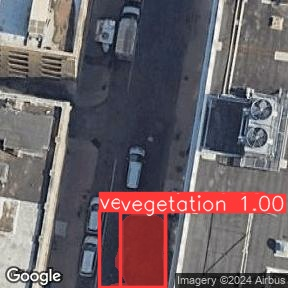

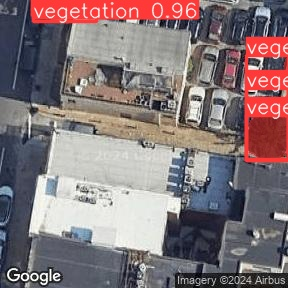

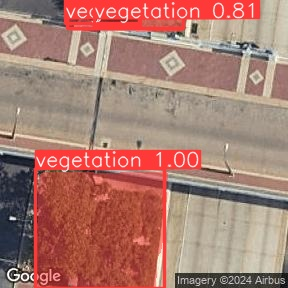

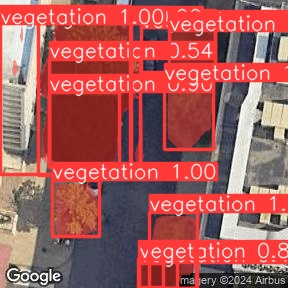

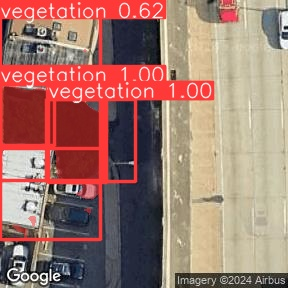

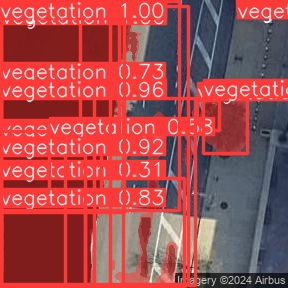

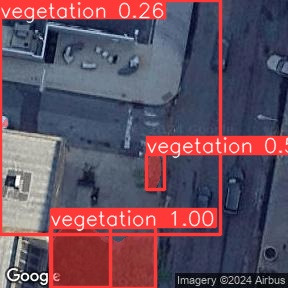

In [83]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict5/*.jpg')[:]:
      display(Image(filename=image_path, height=600))
      print("\n")

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [3]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|███████████████████████████████████████████████████████████████████████████████| 780M/780M [02:13<00:00, 6.13MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.2.16 ðŸš€ Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found âš ï¸�, missing path 'C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\images\val'
Dataset download success âœ… (1.5s), saved to C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets

val: New cache created: C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\val.cache
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.269
                   dog          4          1       0.37          1      0.995      0.597
                 horse          4          2      0.751          1      0.995      0.631
              elephant          4          2      0.505        0.5      0.828  


  0%|          | 0.00/433k [00:00<?, ?B/s]
100%|##########| 433k/433k [00:00<00:00, 9.92MB/s]

Unzipping C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8.zip to C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8...:   0%|          | 0/25 [00:00<?, ?file/s]
Unzipping C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8.zip to C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8...: 100%|##########| 25/25 [00:00<00:00, 1976.17file/s]

  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|##########| 755k/755k [00:00<00:00, 9.41MB/s]

val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\val...:   0%|          | 0/4 [00:00<?, ?it/s]
val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\val... 4 images, 0 backgrounds, 0 corrupt: 100%|##########| 4/4 [00:00<00:00, 199.19it/s]

                 Class     Images  Instances      

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [16]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.2.16 ðŸš€ Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: Native output logging mode is not available, falling back to basic output logging
COMET INFO: Experiment is live on comet.com https://www.comet.com/hshaikusa/general/526c0c40101644d3bfa799c659fde726


train: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\train...:   0%|          | 0/4 [00:00<?, ?it/s]
train: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\train... 1 images, 0 backgrounds, 0 corrupt:  25%|##5       | 1/4 [00:00<00:00,  4.54it/s]
train: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\train... 4 images, 0 backgrounds, 0 corrupt: 100%|##########| 4/4 [00:00<00:00, 18.00it/s]

val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|#######

# 4. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolov8n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`, `batch`                                                     |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |

In [5]:
!yolo export model=yolov8n.pt format=torchscript

Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.2.1+cu121...
TorchScript: export success ✅ 2.0s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (4.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco8.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

# 6. Tasks

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [7]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|█████████████████████████████████████████████████████████████████████████████| 6.73M/6.73M [00:00<00:00, 15.3MB/s]


Ultralytics YOLOv8.2.16  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|███████████████████████████████████████████████████████████████████████████████| 439k/439k [00:00<00:00, 8.38MB/s]
Unzipping C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8-seg.zip to C:\Users\Hashim\DIS-9901

Dataset download success  (1.1s), saved to C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 

YOLOv8n-seg summary: 261 layers, 3409968 parameters, 3409952 gradients, 12.8 GFLOPs

Transferred 417/417 items from pretrained weights


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/hshaikusa/general/0a20daee08644780a1655edfa3234a30



Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8-seg\labels\train... 4 images,

train: New cache created: C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8-seg\labels\train.cache



val: Scanning C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8-seg\labels\val... 4 images, 0 b

val: New cache created: C:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\datasets\coco8-seg\labels\val.cache



COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.107      3.179      2.864      1.404         25        640: 100%|██████████| 1/1 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all          4         17      0.701      0.633      0.752      0.475      0.664      0.533      0.611      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.174      2.643      2.402      1.356         23        640: 100%|██████████| 1/1 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all          4         17      0.702      0.633      0.745      0.486       0.69      0.617      0.634      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.9311      2.302      3.567      1.296         15        640: 100%|██████████| 1/1 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all          4         17      0.707      0.617      0.745      0.489      0.707      0.617      0.634      0.438



3 epochs completed in 0.002 hours.
Optimizer stripped from runs\segment\train\weights\last.pt, 7.1MB
Optimizer stripped from runs\segment\train\weights\best.pt, 7.1MB

Validating runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.16  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all          4         17      0.709      0.617      0.745      0.489      0.709      0.617      0.634      0.437
                person          4         10      0.573        0.7      0.676      0.308      0.573        0.7      0.595      0.261
                   dog          4          1      0.819          1      0.995      0.796      0.819          1      0.995      0.895
                 horse          4          2      0.306          1      0.995      0.407      0.306          1      0.414      0.108
              elephant          4          2          1          0      0.559      0.335          1          0      0.559      0.335
              umbrella          4          1      0.557          1      0.995      0.895      0.557          1      0.995      0.895
          potted plant          4          1          1          0      0.249      0.189          1          0      0.249      0.129
Speed: 13.0ms preprocess, 143.4ms inference, 0.0ms loss, 2.9ms postpr

COMET ERROR: We failed to read file runs\segment\train\F1_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs\segment\train\P_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs\segment\train\R_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs\segment\train\PR_curve.png for uploading.
Please double-check the file path and permissions
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : clever_tarantula_1695
COMET INFO:     url                   : https://www.comet.com/hshaikusa/general/0a20daee08644780a1655edfa3

100%|███████████████████████████████████████████████████████████████████████████████| 476k/476k [00:00<00:00, 8.94MB/s]

image 1/1 c:\Users\Hashim\DIS-9901A\DigitalTwinData\code\ultralytics\examples\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 103.7ms


Speed: 3.5ms preprocess, 103.7ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 4. Pose

YOLOv8 _pose_ models use the `-pose` suffix, i.e. `yolov8n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 4. Oriented Bounding Boxes (OBB)

YOLOv8 _OBB_ models use the `-obb` suffix, i.e. `yolov8n-obb.pt` and are pretrained on the DOTA dataset. See [OBB Docs](https://docs.ultralytics.com/tasks/obb/) for full details.

In [ ]:
# Load YOLOv8n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')  # load a pretrained YOLOv8n OBB model
model.train(data='coco8-dota.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

# Appendix

Additional content below.

In [ ]:
# Pip install from source
!pip install git+https://github.com/ultralytics/ultralytics@main

In [ ]:
# Git clone and run tests on updates branch
!git clone https://github.com/ultralytics/ultralytics -b main
%pip install -qe ultralytics

In [ ]:
# Run tests (Git clone only)
!pytest ultralytics/tests

In [ ]:
# Validate multiple models
for x in 'nsmlx':
  !yolo val model=yolov8{x}.pt data=coco.yaml